# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\AI04829\OneDrive - Anthem\Desktop\Keshav\dataset_diabetes\diabetic_data.csv').replace({'?':None})

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),None,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),None,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),None,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),None,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),None,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.shape

(101766, 50)

In [5]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

# Removing Unique value columns

In [6]:
df['duplicate'] = df['patient_nbr'].duplicated()
df = df[df['duplicate'] == False]
df = df.drop(['duplicate'], axis = 1)

In [7]:
print(len(pd.unique(df['encounter_id'])))
print(len(pd.unique(df['patient_nbr'])))

71518
71518


In [8]:
#Therfore dropping the encounter_id column
df=df.drop(labels=['encounter_id', 'patient_nbr'], axis=1)

In [9]:
df.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),None,6,25,1,1,None,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),None,1,1,7,3,None,None,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),None,1,1,7,2,None,None,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),None,1,1,7,2,None,None,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),None,1,1,7,1,None,None,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [10]:
df.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

# EDA - Facet

In [11]:
#!pip install facets-overview

In [12]:
#!pip install --upgrade "protobuf<=3.20.1"

In [13]:
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator
import base64

gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'train', 'table': df}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

In [14]:
from IPython.core.display import display, HTML

HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

C:\Users\AI04829\AppData\Local\Temp\1\ipykernel_2432\3688853136.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Dropping Unnecessary Rows and Columns

In [15]:
df=df.drop(labels=['weight', 'acetohexamide','tolbutamide','acarbose','miglitol','troglitazone',
                   'tolazamide', 'examide','citoglipton','glipizide-metformin', 'glyburide-metformin', 
                   'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'], axis=1)

In [16]:
df.shape

(71518, 34)

In [17]:
df.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,71518.000000,71518.000000,71518.000000,71518.00000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000
mean,2.100254,3.593235,5.657457,4.28913,43.075478,1.430577,15.705025,0.280069,0.103540,0.177829,7.245700
std,1.508301,5.269771,4.162580,2.94921,19.952338,1.759864,8.311163,1.068957,0.509187,0.603790,1.994674
min,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.00000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,1.000000,7.000000,3.00000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000
75%,3.000000,3.000000,7.000000,6.00000,57.000000,2.000000,20.000000,0.000000,0.000000,0.000000,9.000000
max,8.000000,28.000000,25.000000,14.00000,132.000000,6.000000,81.000000,42.000000,42.000000,12.000000,16.000000


In [18]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin',
       'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [19]:
df = df.loc[~df['discharge_disposition_id'].isin([11,13,14,19,20,21])]

In [20]:
df.shape

(69973, 34)

# Mapping the values

In [21]:
pd.unique(df['admission_type_id'])

array([6, 1, 2, 3, 4, 5, 8, 7], dtype=int64)

In [22]:
newdata={"admission_type_id": {1:'Emergency', 2:'Urgent', 3:'Elective', 4:'Newborn', 5:None, 
         6:None, 7:'Trauma Center', 8:None},
        
        "discharge_disposition_id": {1:'Discharged to home', 2:'Discharged/transferred to another short term hospital', 
                                     3:'Discharged/transferred to SNF', 4:'Discharged/transferred to ICF', 
                                     5:'Discharged/transferred to another type of inpatient care institution', 
                                     6:'Discharged/transferred to home with home health service', 7:'Left AMA', 
                                     8:'Discharged/transferred to home under care of Home IV provider', 
                                     9:'Admitted as an inpatient to this hospital', 
                                     10:'Neonate discharged to another hospital for neonatal aftercare', 11:'Expired', 
                                     12:'Still patient or expected to return for outpatient services', 
                                     13:'Hospice / home', 14:'Hospice / medical facility', 
                                     15:'Discharged/transferred within this institution to Medicare approved swing bed', 
                                     16:'Discharged/transferred/referred another institution for outpatient services', 
                                     17:'Discharged/transferred/referred to this institution for outpatient services', 
                                     18:None, 19:'Expired at home. Medicaid only, hospice.', 
                                     20:'Expired in a medical facility. Medicaid only, hospice.', 
                                     21:'Expired, place unknown. Medicaid only, hospice.', 
                                     22:'Discharged/transferred to another rehab fac including rehab units of a hospital .', 
                                     23:'Discharged/transferred to a long term care hospital.', 
                                     24:'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.', 
                                     25:None, 26:None, 
                                     27:'Discharged/transferred to a federal health care facility.', 
                                     28:'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital', 
                                     29:'Discharged/transferred to a Critical Access Hospital (CAH).', 
                                     30:'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere'},
         
         "admission_source_id": {1:'Physician Referral', 2:'Clinic Referral', 3:'HMO Referral', 4:'Transfer from a hospital', 
                                 5:'Transfer from a Skilled Nursing Facility (SNF)', 6:'Transfer from another health care facility', 
                                 7:'Emergency Room', 8:'Court/Law Enforcement', 9:'Not Available', 10:'Transfer from critial access hospital', 
                                 11:'Normal Delivery', 12:'Premature Delivery', 13:'Sick Baby', 14:'Extramural Birth',
                                 15:None, 17:None, 18:'Transfer From Another Home Health Agency', 
                                 19:'Readmission to Same Home Health Agency', 20:None, 21:None, 
                                 22:'Transfer from hospital inpt/same fac reslt in a sep claim', 
                                 23:'Born inside this hospital', 24:'Born outside this hospital', 25:'Transfer from Ambulatory Surgery Center', 
                                 26:'Transfer from Hospice'}
        }



#Not Mapped,NULL,Not Available==None??

In [23]:
df=df.replace(newdata)
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),None,None,Physician Referral,1,None,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,None,None,59,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,None,None,11,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,None,None,44,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,None,None,51,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO


In [24]:
def func(v):
    if(v == None):
        return None
    elif(str(v).startswith('V') or str(v).startswith('E')):
        return 'Other - External causes of injury and supplemental classification'
    elif(280<= float(v) <= 289):
        return 'Other - Diseases of the blood and blood-forming organs'
    elif(320<= float(v) <= 359):
        return 'Other - Diseases of the nervous system'
    elif(630<= float(v) <= 679):
        return 'Other - Complications of pregnancy, childbirth, and the puerperium'
    elif(360<= float(v) <= 389):
        return 'Other - Diseases of the sense organs'
    elif(740<= float(v) <= 759):
        return 'Other - Congenital anomalies'
    elif(390<= float(v) <= 460) or float(v)==785:
        return 'Circulatory'
    elif(460<= float(v) <= 520) or float(v)==786:
        return 'Respiratory'
    elif(520<= float(v) <= 580) or float(v)==787:
        return 'Digestive'
    elif(250<= float(v) < 251):
        return 'Diabetes' 
    elif(800<= float(v) <= 999):
        return 'Injury'
    elif(710<= float(v) <= 739):
        return 'Musculoskeletal'
    elif(580<= float(v) <= 629) or float(v)==788:
        return 'Genitourinary' 
    elif(140<= float(v) <= 239):
        return 'Neoplasms - Neoplasms'
    elif(790<= float(v) <= 799) or float(v)==780 or float(v)==781 or float(v)==784:
        return 'Neoplasms - Other symptoms, signs, and ill-defined conditions' 
    elif(240<= float(v) <= 249) or (251<= float(v) <= 279):
         return 'Neoplasms - Endocrine, nutritional, and metabolic diseases and immunity disorders, without diabetes'
    elif(680<= float(v) <= 709) or float(v)==782:
        return 'Neoplasms - Diseases of the skin and subcutaneous tissue'
    elif(1<= float(v) <= 139):
        return 'Neoplasms - Infectious and parasitic diseases'
    elif(290<= float(v) <= 319):
        return 'Neoplasms - Mental disorders'
    elif(float(v)==783):
        return 'Symptoms concerning nutrition, metabolism, and development'
    elif(float(v)==789):
        return 'Abdominal pain'


In [25]:
col=['diag_1', 'diag_2', 'diag_3']
for ele in col:
    df[ele]=df[ele].apply(func)

In [26]:
print(len(df['diag_1'].unique()))
print(len(df['diag_2'].unique()))
print(len(df['diag_3'].unique()))

#19 +2(Codes: 783, 789) +1(Null)=22

22
22
22


In [27]:
df.isna().sum()

race                         1918
gender                          0
age                             0
admission_type_id            7893
discharge_disposition_id     3252
admission_source_id          4973
time_in_hospital                0
payer_code                  30415
medical_specialty           33639
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         10
diag_2                        293
diag_3                       1224
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
glipizide                       0
glyburide                       0
pioglitazone                    0
rosiglitazone 

# Imputing Missing Values

In [28]:
for i in df.columns:
    print(i, " values: " ,pd.unique(df[i]))

race  values:  ['Caucasian' 'AfricanAmerican' None 'Other' 'Asian' 'Hispanic']
gender  values:  ['Female' 'Male' 'Unknown/Invalid']
age  values:  ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
admission_type_id  values:  [None 'Emergency' 'Urgent' 'Elective' 'Newborn' 'Trauma Center']
discharge_disposition_id  values:  [None 'Discharged to home' 'Discharged/transferred to SNF'
 'Discharged/transferred to home with home health service'
 'Discharged/transferred to another short term hospital'
 'Discharged/transferred to another type of inpatient care institution'
 'Left AMA'
 'Neonate discharged to another hospital for neonatal aftercare'
 'Discharged/transferred to ICF'
 'Discharged/transferred to home under care of Home IV provider'
 'Still patient or expected to return for outpatient services'
 'Discharged/transferred/referred to this institution for outpatient services'
 'Discharged/transferred/referred another institution for o

In [29]:
df['race'] = df['race'].fillna(df['race'].mode()[0])

In [30]:
df['gender']= df['gender'].replace('Unknown/Invalid', None)

In [31]:
df['gender'].value_counts()

Female    37229
Male      32741
Name: gender, dtype: int64

In [32]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

In [33]:
df['diag_1'] = df['diag_1'].fillna(df['diag_1'].mode()[0])
df['diag_2'] = df['diag_2'].fillna(df['diag_2'].mode()[0])
df['diag_3'] = df['diag_3'].fillna(df['diag_3'].mode()[0])

In [34]:
print(len(df['diag_1'].unique()))
print(len(df['diag_2'].unique()))
print(len(df['diag_3'].unique()))

21
21
21


In [35]:
(df['diag_1']).value_counts()

Circulatory                                                                                            21394
Respiratory                                                                                             9486
Digestive                                                                                               6488
Diabetes                                                                                                5748
Injury                                                                                                  4694
Musculoskeletal                                                                                         4064
Genitourinary                                                                                           3439
Neoplasms - Neoplasms                                                                                   2538
Neoplasms - Endocrine, nutritional, and metabolic diseases and immunity disorders, without diabetes     1850
Neoplasms - Disease

In [36]:
(df['diag_3']).value_counts()

Circulatory                                                                                            22089
Diabetes                                                                                               12546
Neoplasms - Endocrine, nutritional, and metabolic diseases and immunity disorders, without diabetes     6403
Respiratory                                                                                             4649
Genitourinary                                                                                           4038
Other - External causes of injury and supplemental classification                                       3516
Digestive                                                                                               2708
Neoplasms - Mental disorders                                                                            2144
Other - Diseases of the blood and blood-forming organs                                                  1723
Neoplasms - Other s

In [37]:
(df['diag_2']).value_counts()

Circulatory                                                                                            22373
Diabetes                                                                                                9700
Respiratory                                                                                             6925
Neoplasms - Endocrine, nutritional, and metabolic diseases and immunity disorders, without diabetes     5605
Genitourinary                                                                                           5327
Digestive                                                                                               2854
Neoplasms - Diseases of the skin and subcutaneous tissue                                                2284
Other - Diseases of the blood and blood-forming organs                                                  2075
Neoplasms - Mental disorders                                                                            1856
Injury             

In [38]:
df['admission_type_id']=df['admission_type_id'].fillna(df['admission_type_id'].mode()[0])
df['discharge_disposition_id']=df['discharge_disposition_id'].fillna(df['discharge_disposition_id'].mode()[0])
df['admission_source_id']=df['admission_source_id'].fillna(df['admission_source_id'].mode()[0])

In [39]:
df=df.drop(labels=['payer_code', 'medical_specialty', 'chlorpropamide'], axis=1)
df.shape

(69973, 31)

In [40]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

# Dropping Duplicates

In [41]:
dt=df.duplicated(subset=['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2',
       'diag_3', 'metformin', 'race', 'repaglinide', 'nateglinide',
       'gender', 'max_glu_serum', 'A1Cresult', 'change',
       'diabetesMed', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'insulin', 'rosiglitazone', 'readmitted'], keep='first')

In [42]:
dt.value_counts()

False    69972
True         1
dtype: int64

In [43]:
df = df.drop_duplicates(keep='first')

In [44]:
df.shape

(69972, 31)

In [45]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),Emergency,Discharged to home,Physician Referral,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,59,0,18,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,11,5,13,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,44,1,16,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,51,0,8,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,Caucasian,Female,[70-80),Emergency,Discharged to home,Emergency Room,9,50,2,33,...,No,No,No,Up,No,No,Steady,Ch,Yes,>30
101755,Other,Female,[40-50),Emergency,Discharged to home,Emergency Room,14,73,6,26,...,No,No,Steady,No,No,No,Up,Ch,Yes,>30
101756,Other,Female,[60-70),Emergency,Discharged to home,Emergency Room,2,46,6,17,...,No,No,No,No,No,No,Steady,No,Yes,>30
101758,Caucasian,Female,[80-90),Emergency,Discharged to home,Emergency Room,5,76,1,22,...,No,No,No,No,No,No,Up,Ch,Yes,NO


# Feature Extraction - Binning

In [46]:
numeric_features=['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 
                  'number_emergency', 'number_inpatient', 'number_diagnoses']

In [47]:
def plotting(ele):
    print(df[ele],':')
    print(df[ele].value_counts())
    plt.hist(df[ele])

0          1
1          3
2          2
3          2
4          1
          ..
101754     9
101755    14
101756     2
101758     5
101765     6
Name: time_in_hospital, Length: 69972, dtype: int64 :
3     12486
2     12178
1     10470
4      9423
5      6697
6      5050
7      3902
8      2843
9      1911
10     1506
11     1188
12      915
13      761
14      642
Name: time_in_hospital, dtype: int64


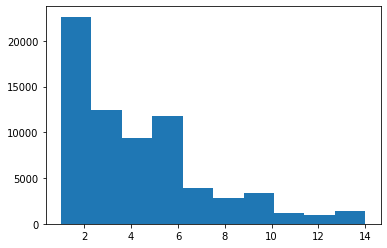

In [48]:
plotting('time_in_hospital')

0         41
1         59
2         11
3         44
4         51
          ..
101754    50
101755    73
101756    46
101758    76
101765    13
Name: num_lab_procedures, Length: 69972, dtype: int64 :
1      2254
43     1862
44     1637
45     1591
38     1521
       ... 
132       1
107       1
120       1
114       1
118       1
Name: num_lab_procedures, Length: 116, dtype: int64


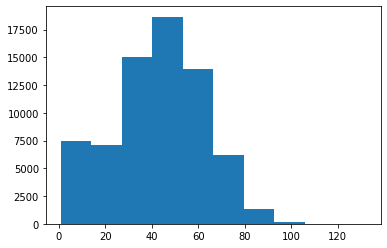

In [49]:
plotting('num_lab_procedures')

0         0
1         0
2         5
3         1
4         0
         ..
101754    2
101755    6
101756    6
101758    1
101765    3
Name: num_procedures, Length: 69972, dtype: int64 :
0    30832
1    13994
2     8939
3     7021
6     3845
4     2961
5     2380
Name: num_procedures, dtype: int64


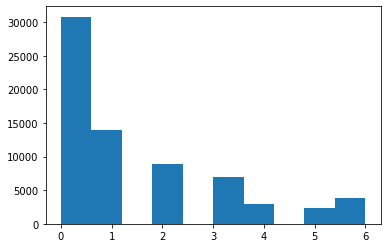

In [50]:
plotting('num_procedures')

0          1
1         18
2         13
3         16
4          8
          ..
101754    33
101755    26
101756    17
101758    22
101765     3
Name: num_medications, Length: 69972, dtype: int64 :
13    4259
12    4242
11    4017
15    3893
10    3854
      ... 
75       2
72       2
81       1
79       1
74       1
Name: num_medications, Length: 75, dtype: int64


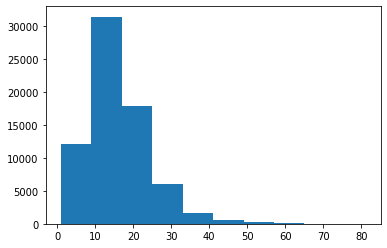

In [51]:
plotting('num_medications')

0         0
1         0
2         2
3         0
4         0
         ..
101754    0
101755    0
101756    1
101758    0
101765    0
Name: number_outpatient, Length: 69972, dtype: int64 :
0     60853
1      4779
2      1981
3      1096
4       574
5       278
6       122
7        72
8        56
9        36
10       28
11       18
12       13
13       13
14       10
15       10
16        7
17        4
20        3
27        2
33        2
24        2
22        2
18        2
19        1
29        1
42        1
36        1
26        1
35        1
21        1
25        1
23        1
Name: number_outpatient, dtype: int64


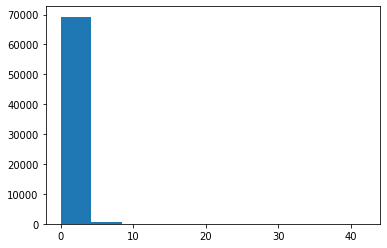

In [52]:
plotting('number_outpatient')

0         0
1         0
2         0
3         0
4         0
         ..
101754    0
101755    1
101756    1
101758    1
101765    0
Name: number_emergency, Length: 69972, dtype: int64 :
0     64872
1      3882
2       789
3       242
4        95
5        32
6        26
8         9
7         8
10        5
9         4
11        2
13        1
42        1
25        1
37        1
20        1
16        1
Name: number_emergency, dtype: int64


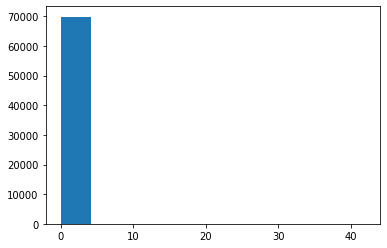

In [53]:
plotting('number_emergency')

0         0
1         0
2         1
3         0
4         0
         ..
101754    0
101755    0
101756    1
101758    0
101765    0
Name: number_inpatient, Length: 69972, dtype: int64 :
0     61781
1      5794
2      1501
3       463
4       228
5       102
6        55
7        19
8        13
9         7
10        5
11        2
12        2
Name: number_inpatient, dtype: int64


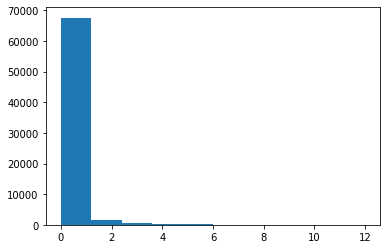

In [54]:
plotting('number_inpatient')

0         1
1         9
2         6
3         7
4         5
         ..
101754    9
101755    9
101756    9
101758    9
101765    9
Name: number_diagnoses, Length: 69972, dtype: int64 :
9     30704
5      8881
6      7566
7      7485
8      7391
4      4442
3      2357
2       881
1       192
16       30
13       10
10        9
15        7
12        6
11        6
14        5
Name: number_diagnoses, dtype: int64


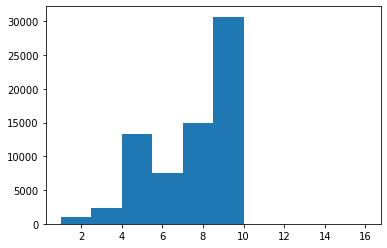

In [55]:
plotting('number_diagnoses')

C:\Users\AI04829\Anaconda3\envs\XAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


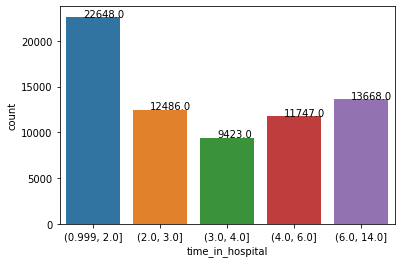

In [56]:
df['time_in_hospital'] = pd.qcut(df['time_in_hospital'], q=5, duplicates='drop')
ax=sns.countplot(df['time_in_hospital'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

C:\Users\AI04829\Anaconda3\envs\XAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


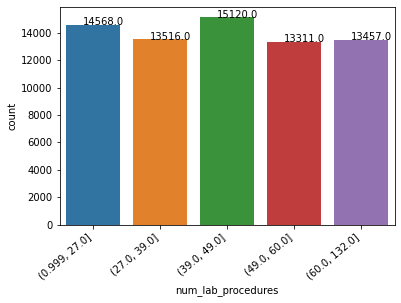

In [57]:
df['num_lab_procedures'] = pd.qcut(df['num_lab_procedures'], q=5, duplicates='drop')
ax=sns.countplot(df['num_lab_procedures'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

C:\Users\AI04829\Anaconda3\envs\XAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


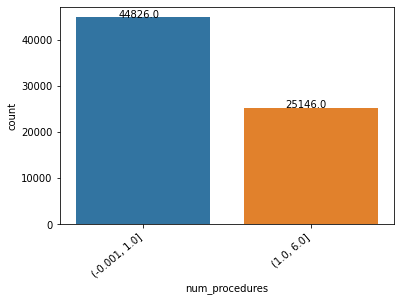

In [58]:
df['num_procedures'] = pd.qcut(df['num_procedures'], q=2, duplicates='drop')
ax=sns.countplot(df['num_procedures'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

C:\Users\AI04829\Anaconda3\envs\XAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


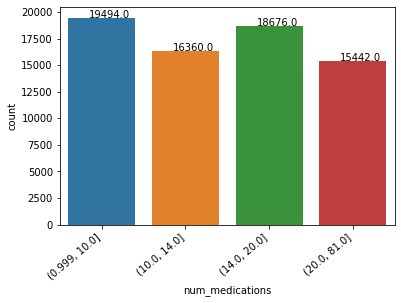

In [59]:
df['num_medications'] = pd.qcut(df['num_medications'], q=4, duplicates='drop')
ax=sns.countplot(df['num_medications'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

C:\Users\AI04829\Anaconda3\envs\XAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


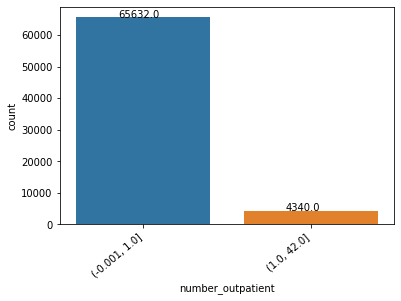

In [60]:
df['number_outpatient'] = pd.qcut(df['number_outpatient'], q=10, duplicates='drop')
ax=sns.countplot(df['number_outpatient'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

C:\Users\AI04829\Anaconda3\envs\XAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


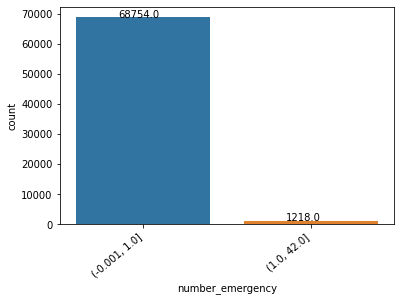

In [61]:
df['number_emergency'] = pd.qcut(df['number_emergency'], q=14, duplicates='drop')
ax=sns.countplot(df['number_emergency'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

C:\Users\AI04829\Anaconda3\envs\XAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


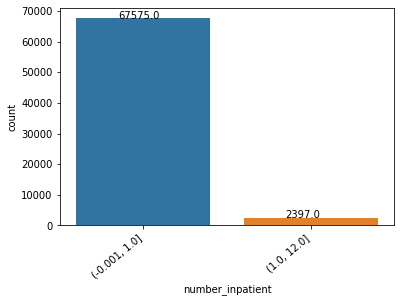

In [62]:
df['number_inpatient'] = pd.qcut(df['number_inpatient'], q=9, duplicates='drop')
ax=sns.countplot(df['number_inpatient'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

C:\Users\AI04829\Anaconda3\envs\XAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


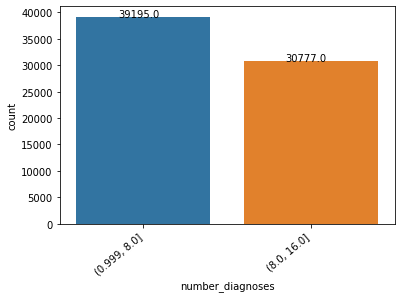

In [63]:
df['number_diagnoses'] = pd.qcut(df['number_diagnoses'], q=2, duplicates='drop')
ax=sns.countplot(df['number_diagnoses'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# Dividing Numerical and Categorical columns for EDA

In [64]:
numeric_features=['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 
                  'number_emergency', 'number_inpatient', 'number_diagnoses']

cat_features = []
for col in df.columns:
    if col not in numeric_features:
        cat_features.append(col)
cat_features.remove('readmitted')
        
target=df['readmitted']

for ele in cat_features:
    numeric_features.append(ele)
cat_features=numeric_features

#Total number of columns
print('Total Number of Features:', len(cat_features) + 1)

Total Number of Features: 31


# Refining Problem Statement

In [65]:
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [66]:
df['readmitted'].value_counts()

NO     41473
>30    22222
<30     6277
Name: readmitted, dtype: int64

In [67]:
df['readmitted'] = df['readmitted'].replace(['NO'],0)
df['readmitted'] = df['readmitted'].replace(['>30'],1)
df['readmitted'] = df['readmitted'].replace(['<30'],1)
#Redefining Problem Statement

In [68]:
df['readmitted'].value_counts()

0    41473
1    28499
Name: readmitted, dtype: int64

In [69]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),Emergency,Discharged to home,Physician Referral,"(0.999, 2.0]","(39.0, 49.0]","(-0.001, 1.0]","(0.999, 10.0]",...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,"(2.0, 3.0]","(49.0, 60.0]","(-0.001, 1.0]","(14.0, 20.0]",...,No,No,No,No,No,No,Up,Ch,Yes,1
2,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,"(0.999, 2.0]","(0.999, 27.0]","(1.0, 6.0]","(10.0, 14.0]",...,No,No,Steady,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,"(0.999, 2.0]","(39.0, 49.0]","(-0.001, 1.0]","(14.0, 20.0]",...,No,No,No,No,No,No,Up,Ch,Yes,0
4,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,"(0.999, 2.0]","(49.0, 60.0]","(-0.001, 1.0]","(0.999, 10.0]",...,No,No,Steady,No,No,No,Steady,Ch,Yes,0


# EDA - Target Variable 

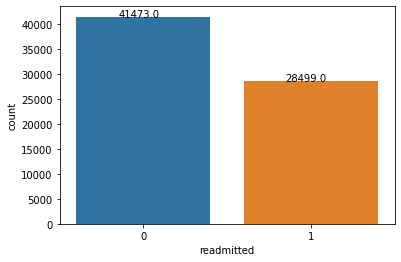

In [70]:
ax=sns.countplot(x=df['readmitted'], orient='V')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [71]:
df.isna().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
glimepiride                 0
glipizide                   0
glyburide                   0
pioglitazone                0
rosiglitazone               0
insulin                     0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64

# Label Encoding

In [72]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [73]:
df1_labelencode = df[['race', 'gender', 'age', 'admission_type_id',
                       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
                       'num_lab_procedures', 'num_procedures', 'num_medications',
                       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
                       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
                       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
                       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change',
                       'diabetesMed']]

In [74]:
df=df.drop(labels=['race', 'gender', 'age', 'admission_type_id',
                       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
                       'num_lab_procedures', 'num_procedures', 'num_medications',
                       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
                       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
                       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
                       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change',
                       'diabetesMed'], axis=1)

In [75]:
df.shape

(69972, 1)

In [76]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()  
for col in df1_labelencode.columns:
    df1_labelencode[col] = label_encoder.fit_transform(df1_labelencode[col])

C:\Users\AI04829\AppData\Local\Temp\1\ipykernel_2432\217111605.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_labelencode[col] = label_encoder.fit_transform(df1_labelencode[col])
C:\Users\AI04829\AppData\Local\Temp\1\ipykernel_2432\217111605.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_labelencode[col] = label_encoder.fit_transform(df1_labelencode[col])
C:\Users\AI04829\AppData\Local\Temp\1\ipykernel_2432\217111605.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [77]:
df1_labelencode.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed
0,2,0,0,1,1,7,0,2,0,0,...,1,1,1,1,1,1,1,1,1,0
1,2,0,1,1,1,2,1,3,0,2,...,1,1,1,1,1,1,1,3,0,1
2,0,0,2,1,1,2,0,0,1,1,...,1,1,1,2,1,1,1,1,1,1
3,2,1,3,1,1,2,0,2,0,2,...,1,1,1,1,1,1,1,3,0,1
4,2,1,4,1,1,2,0,3,0,0,...,1,1,1,2,1,1,1,2,0,1


In [78]:
df=pd.concat([df, df1_labelencode], axis=1)

In [79]:
df

,readmitted,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed
0,0,2,0,0,1,1,7,0,2,0,...,1,1,1,1,1,1,1,1,1,0
1,1,2,0,1,1,1,2,1,3,0,...,1,1,1,1,1,1,1,3,0,1
2,0,0,0,2,1,1,2,0,0,1,...,1,1,1,2,1,1,1,1,1,1
3,0,2,1,3,1,1,2,0,2,0,...,1,1,1,1,1,1,1,3,0,1
4,0,2,1,4,1,1,2,0,3,0,...,1,1,1,2,1,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,1,2,0,7,1,1,2,4,3,1,...,1,1,1,1,3,1,1,2,0,1
101755,1,4,0,4,1,1,2,4,4,1,...,1,1,1,2,1,1,1,3,0,1
101756,1,4,0,6,1,1,2,0,2,1,...,1,1,1,1,1,1,1,2,1,1
101758,0,2,0,8,1,1,2,3,4,0,...,1,1,1,1,1,1,1,3,0,1


In [80]:
df1=df['readmitted']

In [81]:
df=df.drop('readmitted', axis=1)

In [82]:
df=pd.concat([df, df1], axis=1)

In [83]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2,0,0,1,1,7,0,2,0,0,...,1,1,1,1,1,1,1,1,0,0
1,2,0,1,1,1,2,1,3,0,2,...,1,1,1,1,1,1,3,0,1,1
2,0,0,2,1,1,2,0,0,1,1,...,1,1,2,1,1,1,1,1,1,0
3,2,1,3,1,1,2,0,2,0,2,...,1,1,1,1,1,1,3,0,1,0
4,2,1,4,1,1,2,0,3,0,0,...,1,1,2,1,1,1,2,0,1,0


# Visualizations

C:\Users\AI04829\AppData\Local\Temp\1\ipykernel_2432\4261514960.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(9, 6))


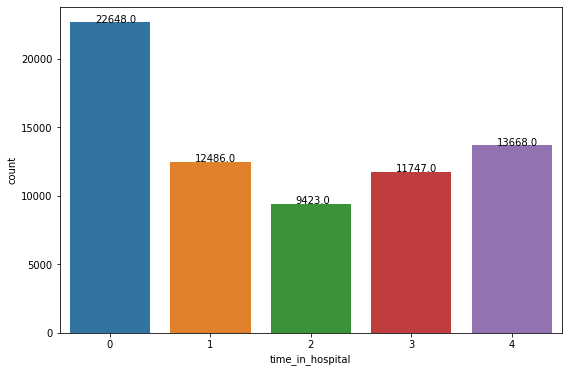

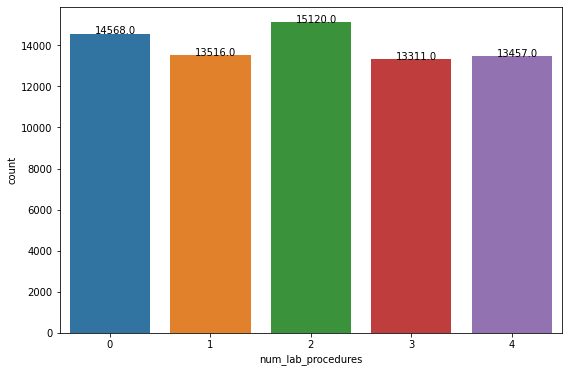

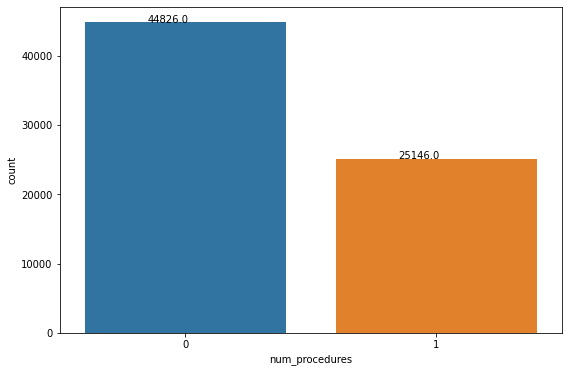

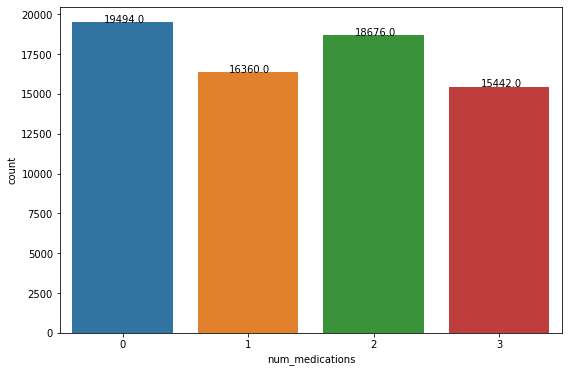

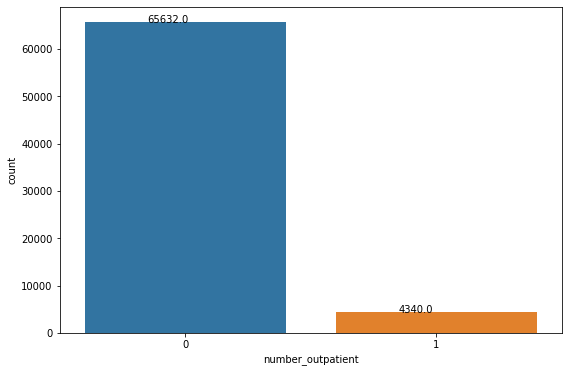

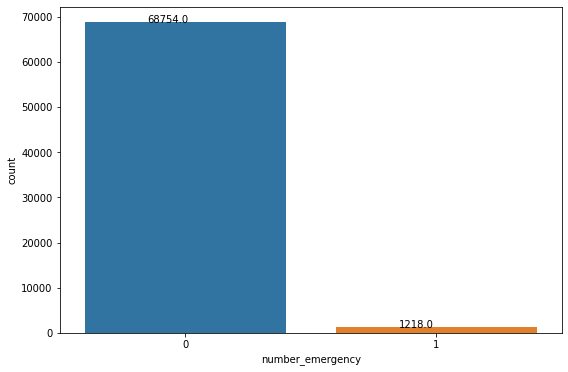

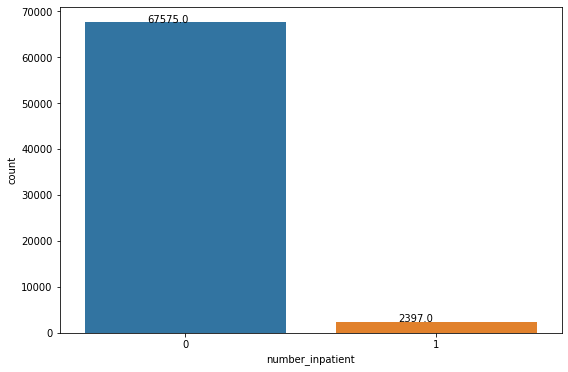

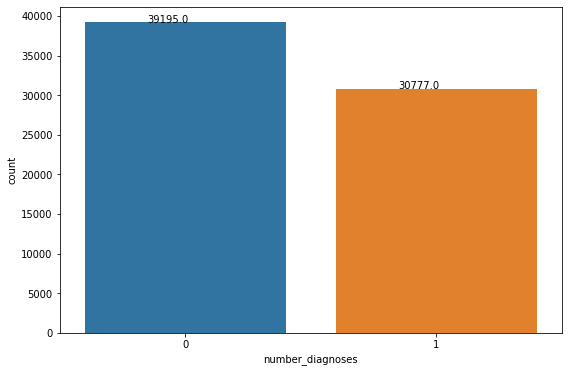

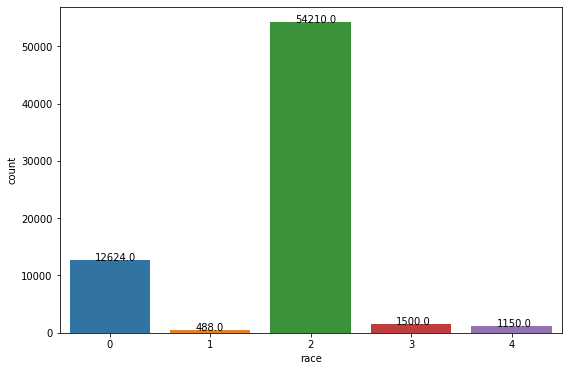

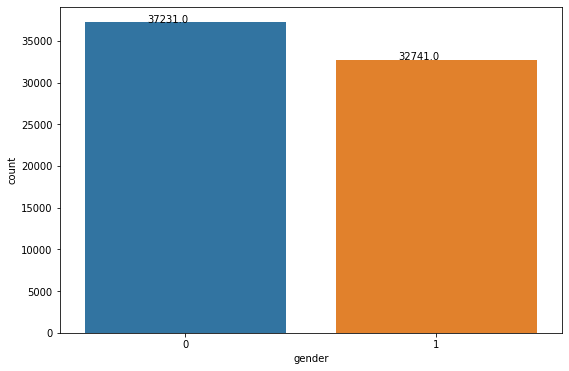

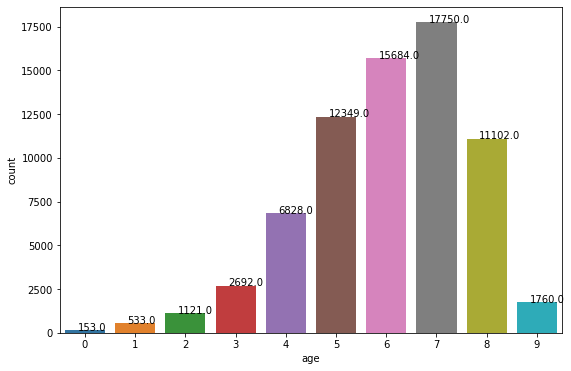

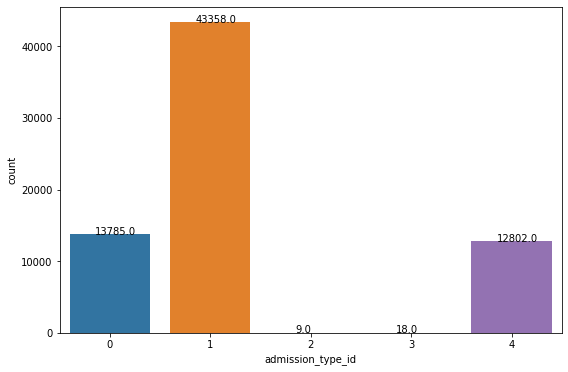

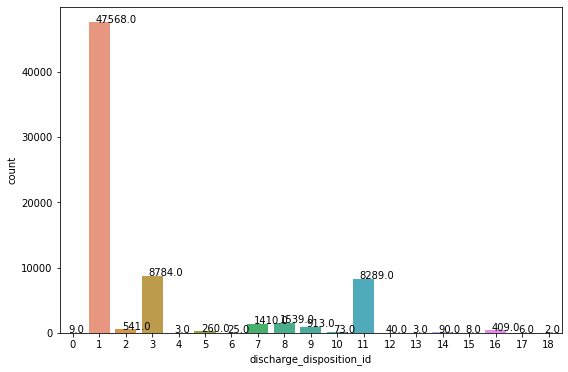

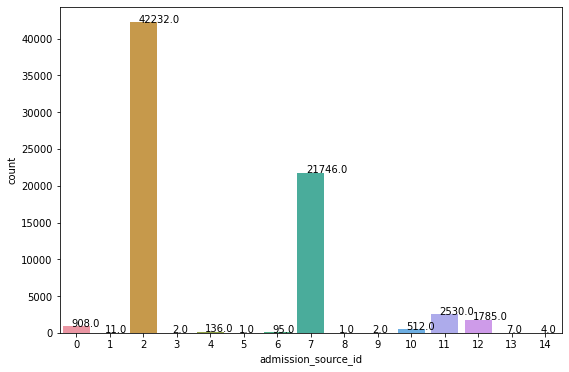

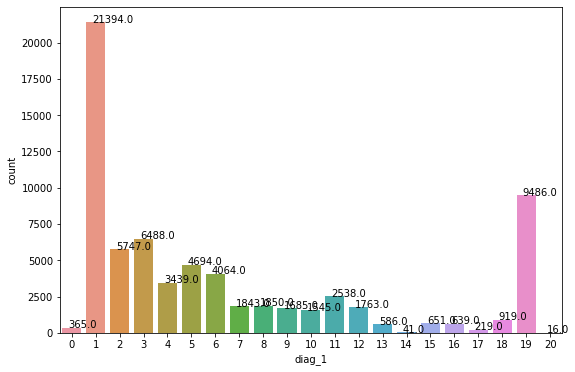

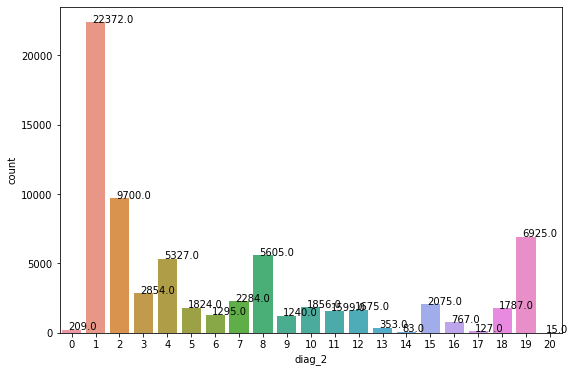

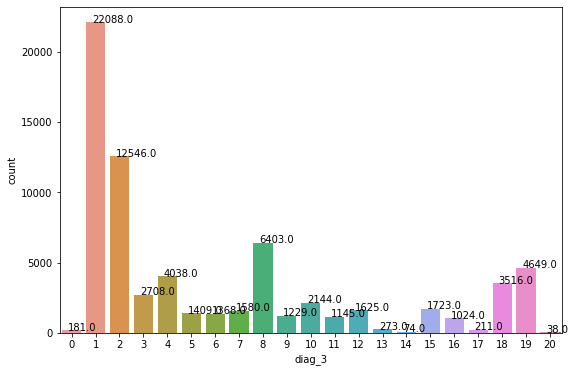

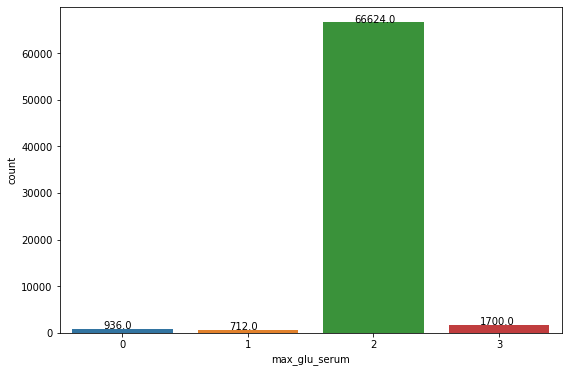

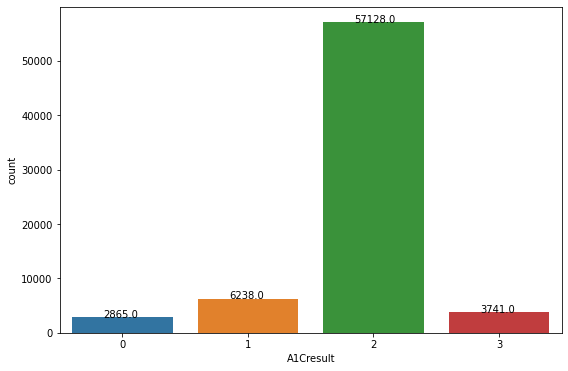

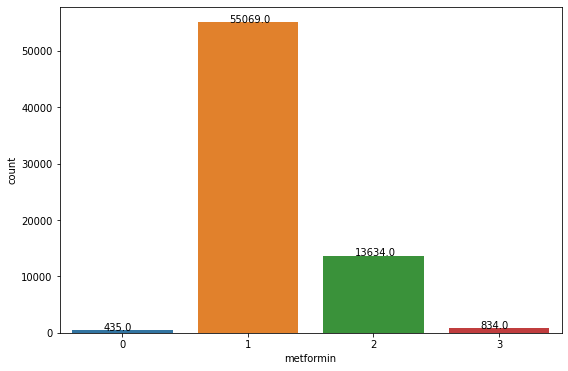

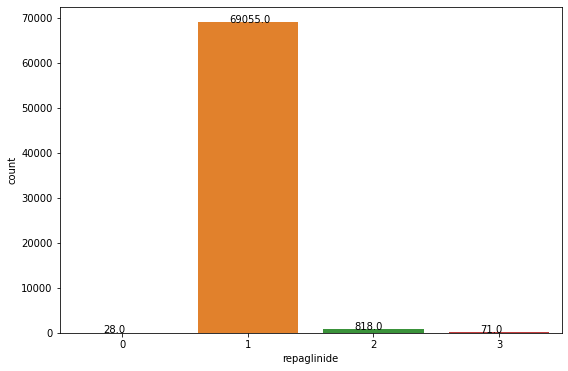

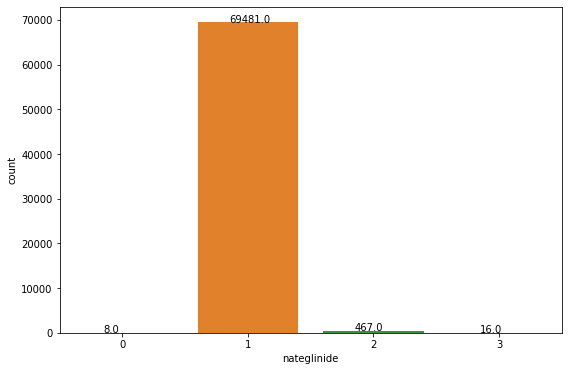

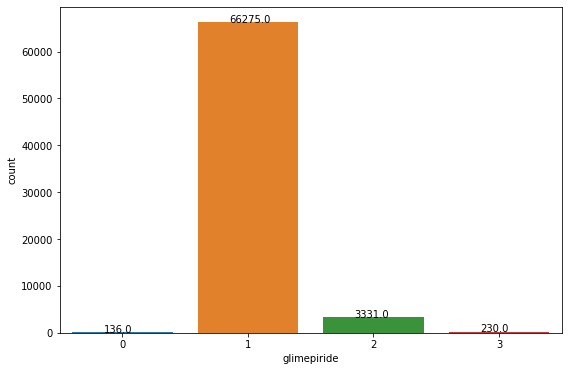

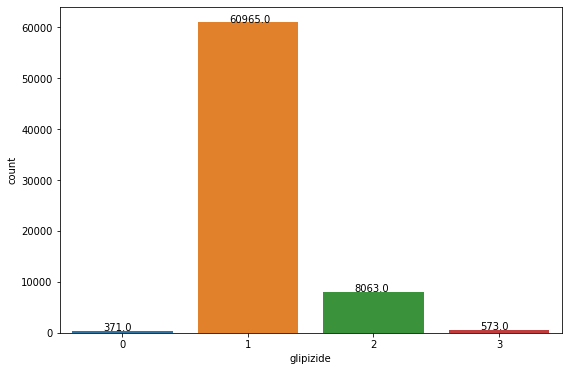

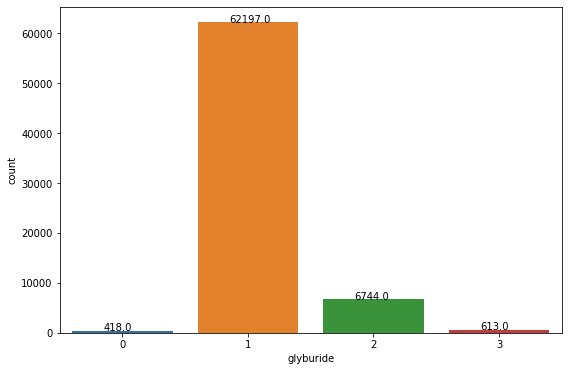

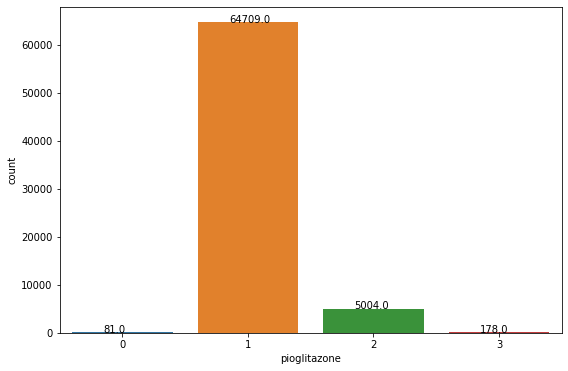

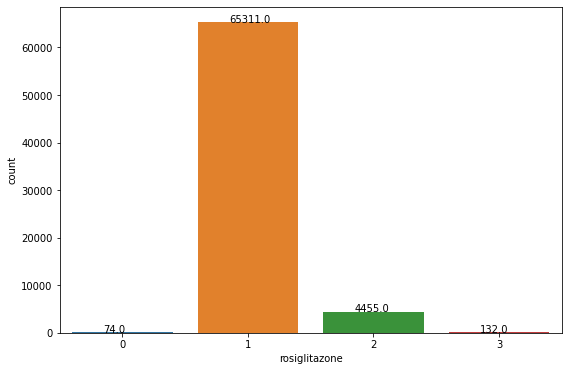

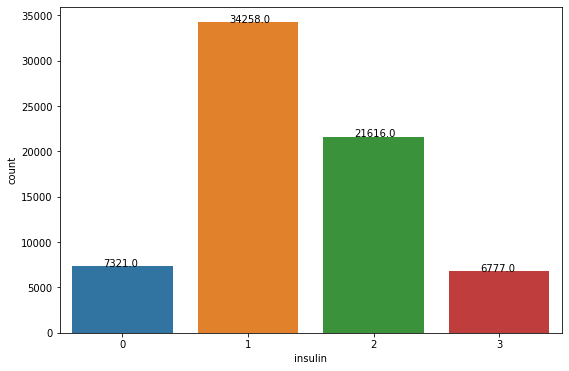

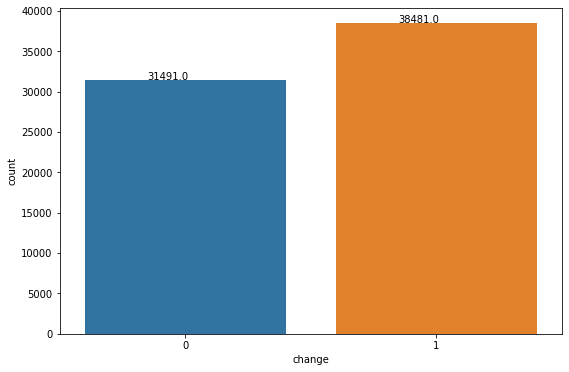

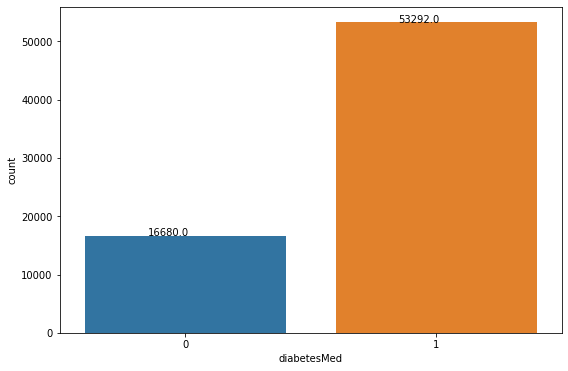

In [84]:
for col in cat_features:
    fig = plt.figure(figsize=(9, 6))
    ax = sns.countplot(x=col, data=df, orient="H")
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

C:\Users\AI04829\AppData\Local\Temp\1\ipykernel_2432\1710748057.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(12, 9))


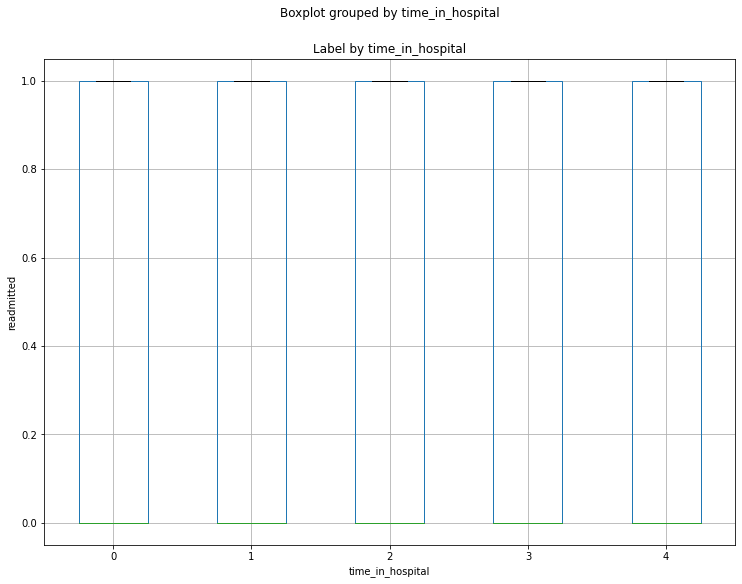

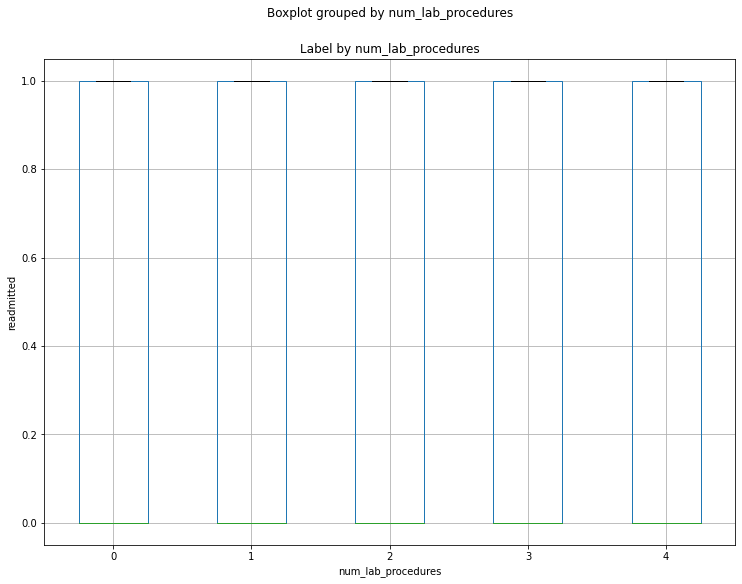

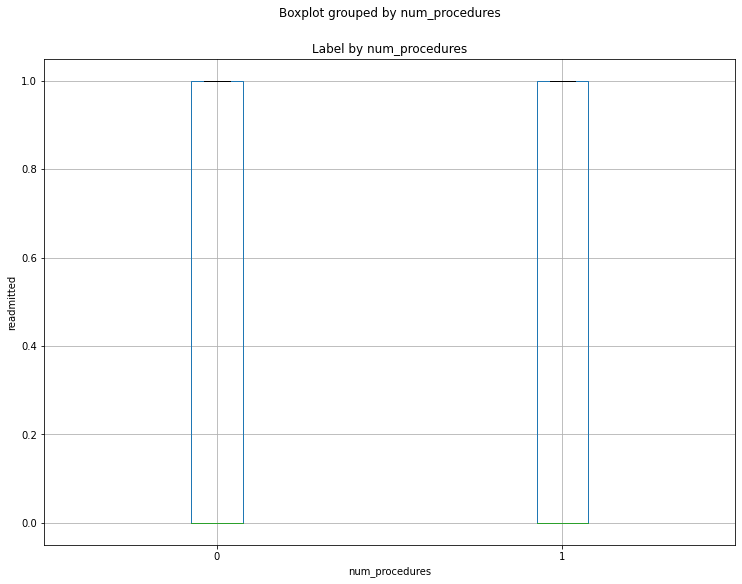

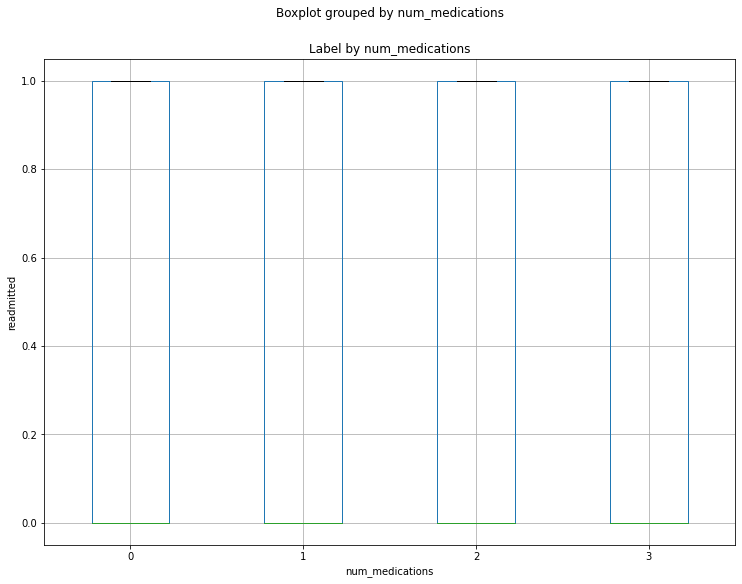

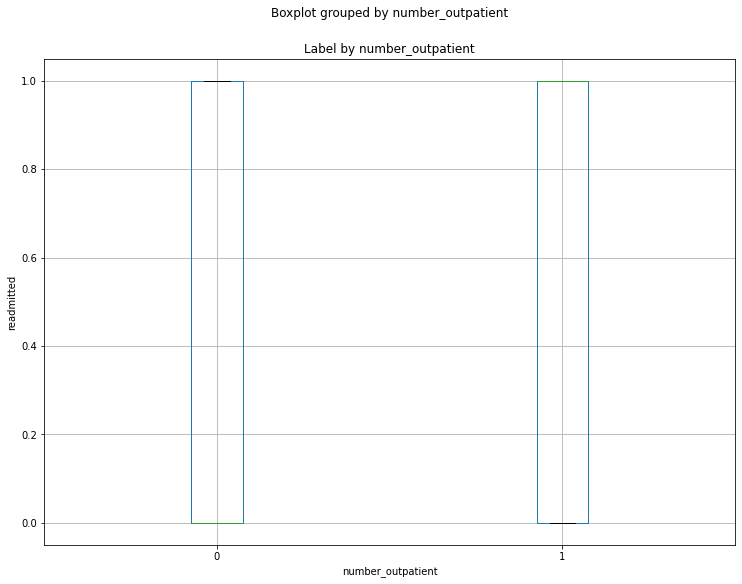

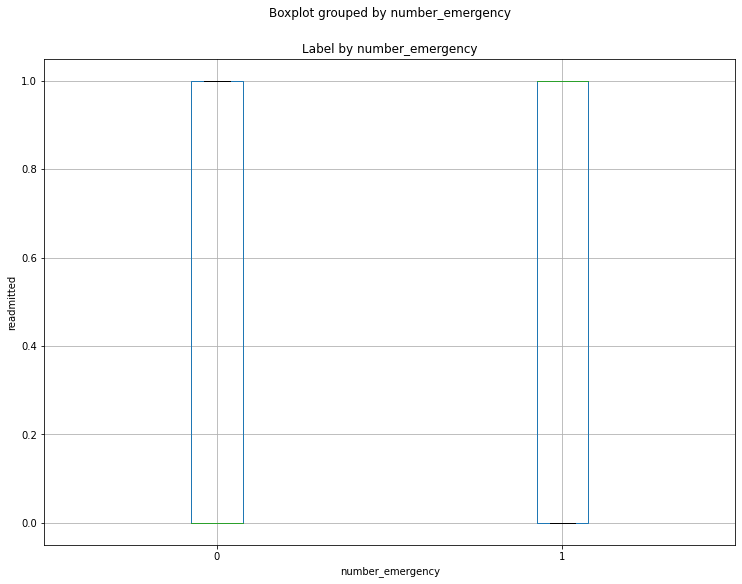

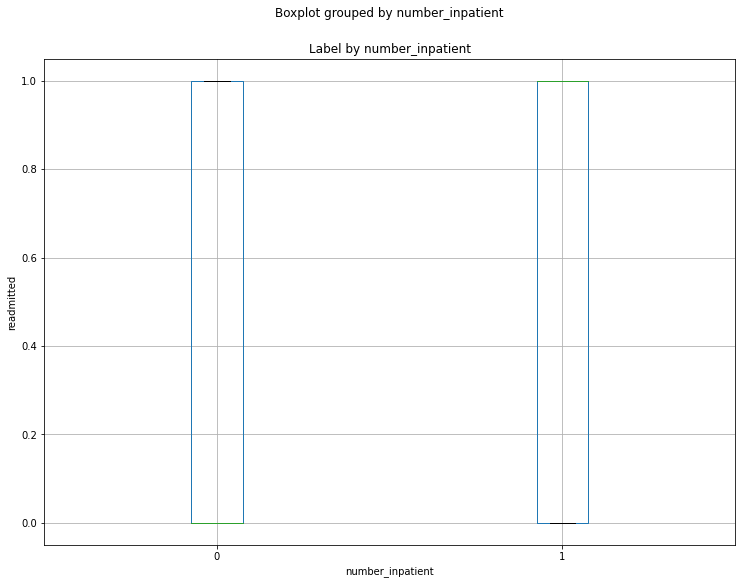

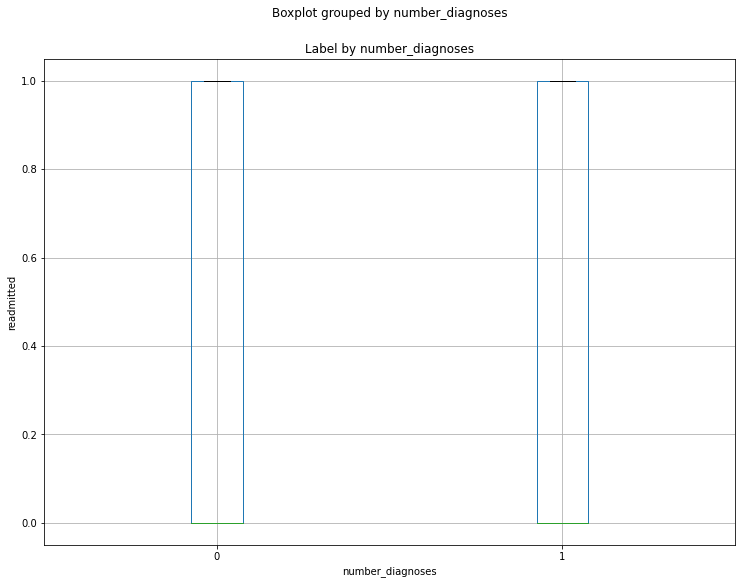

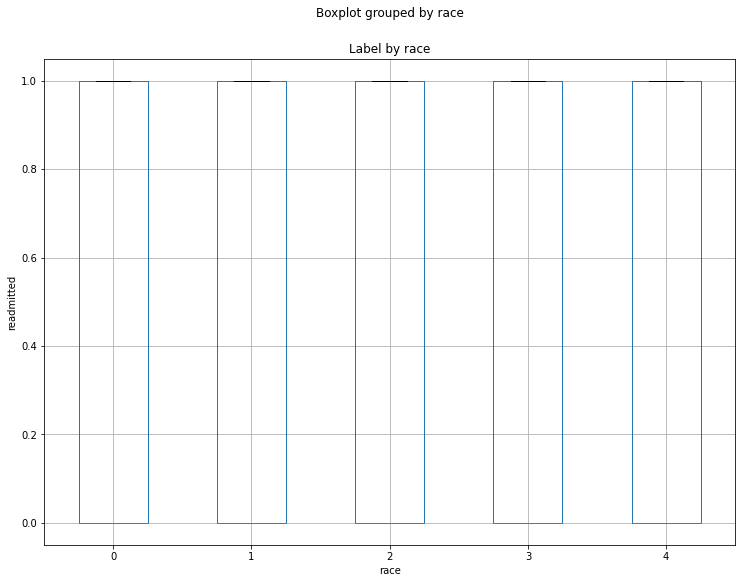

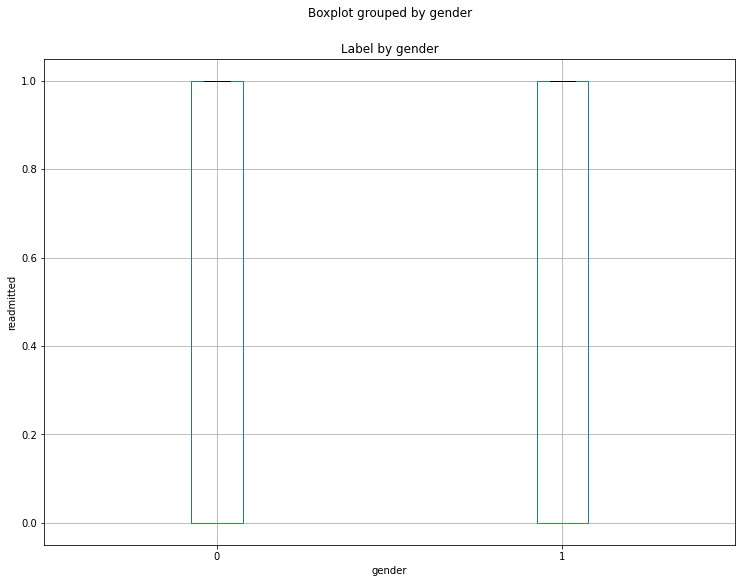

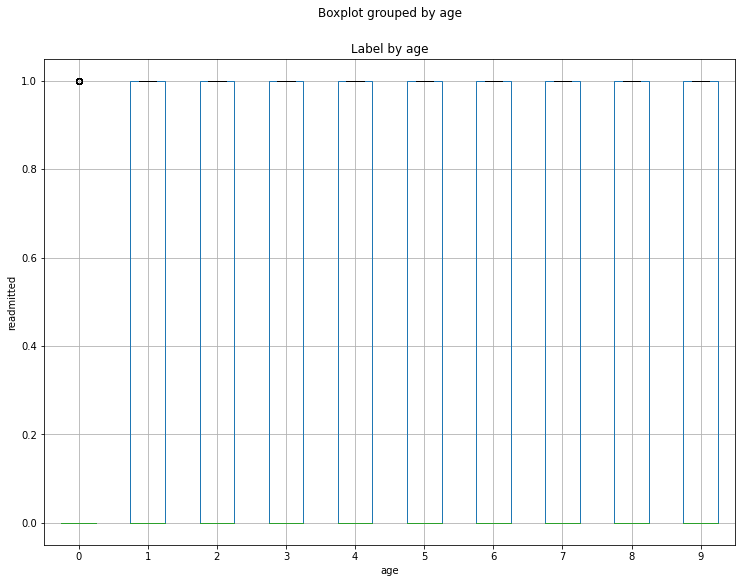

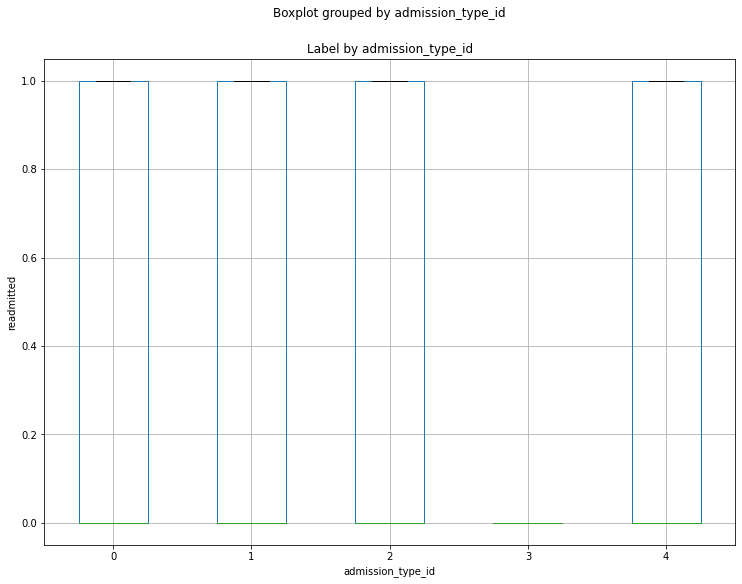

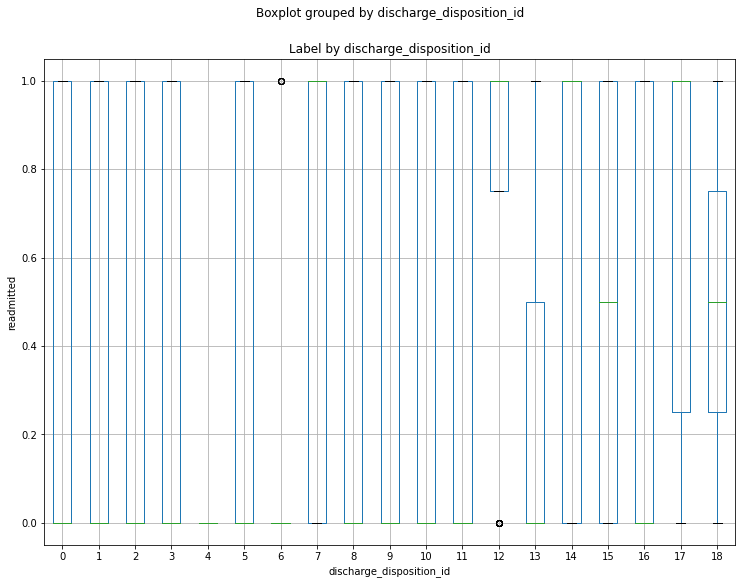

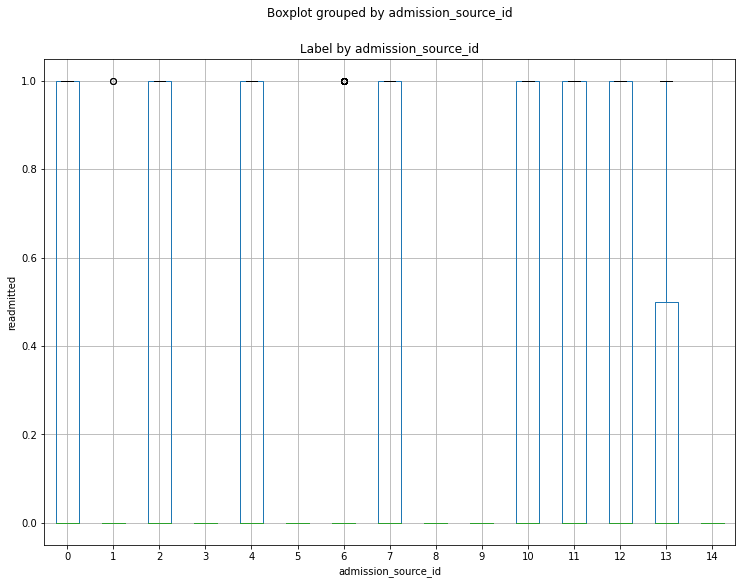

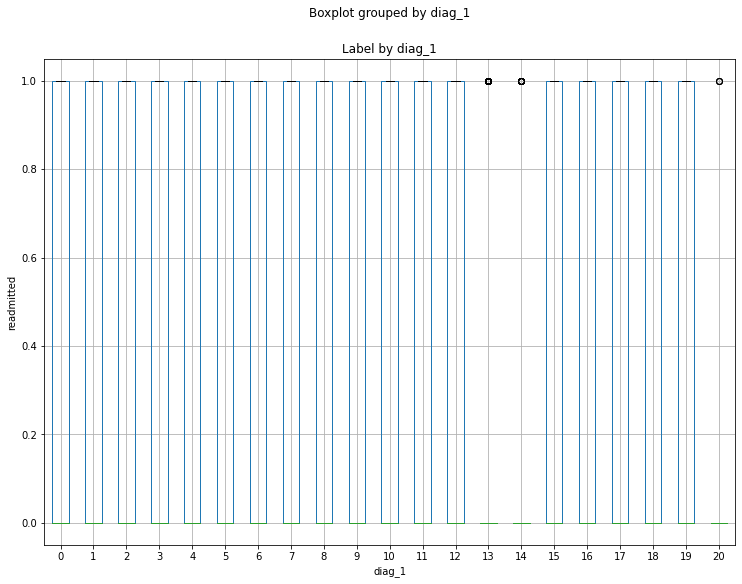

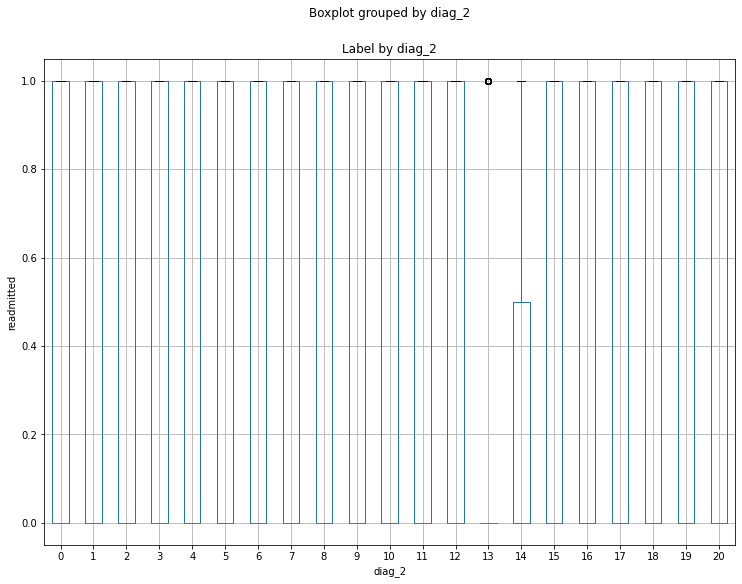

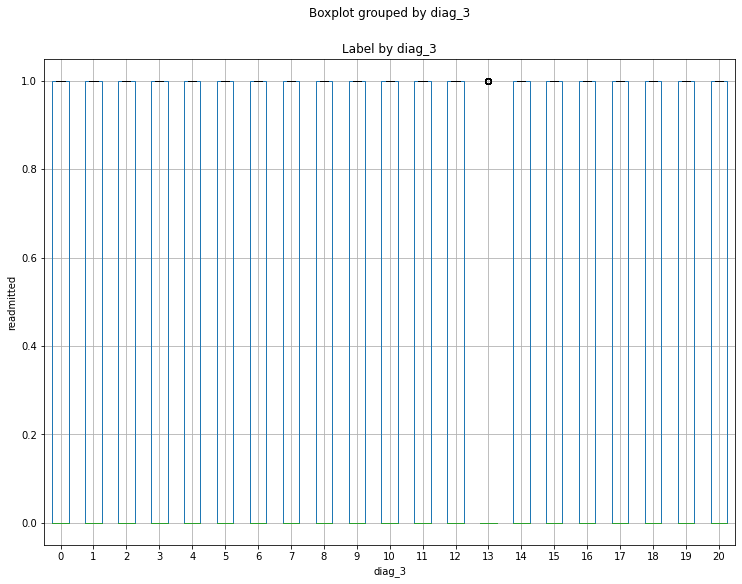

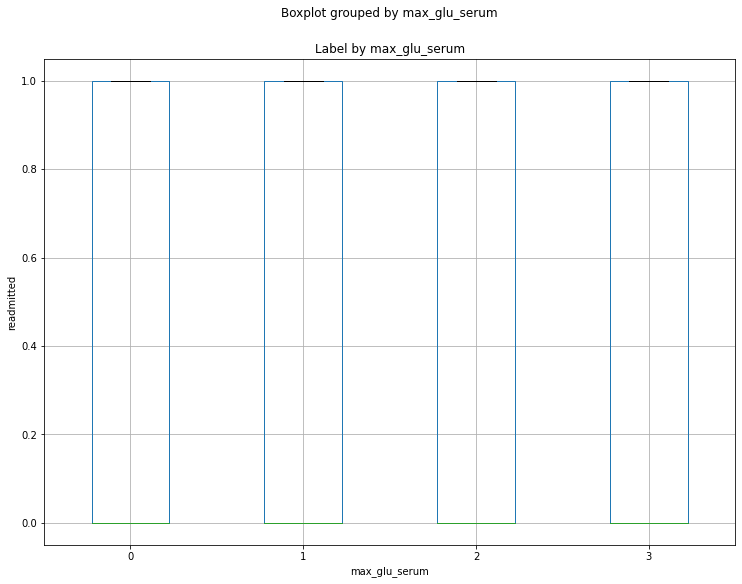

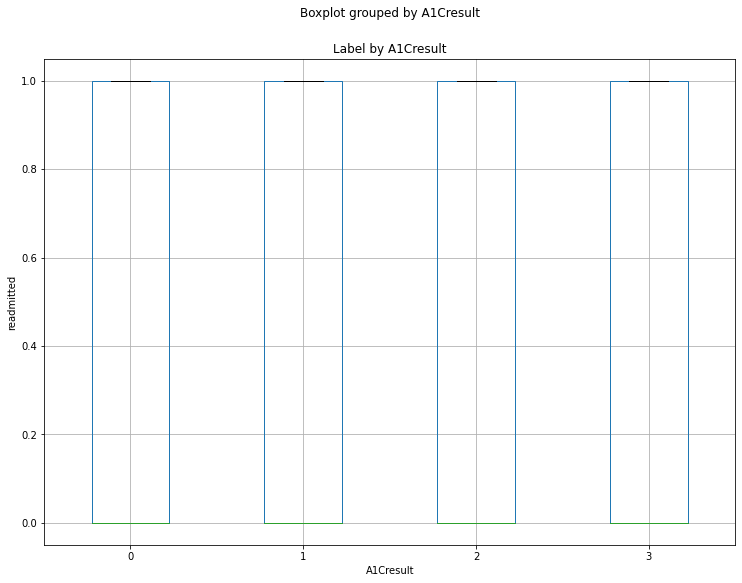

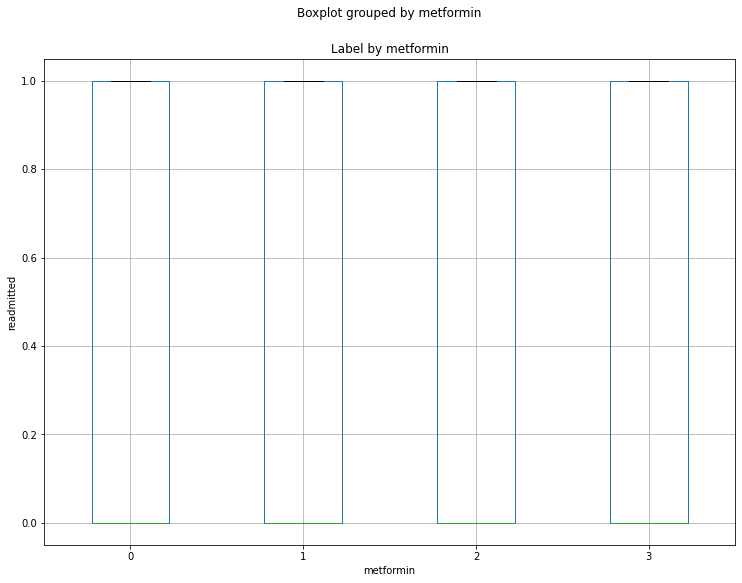

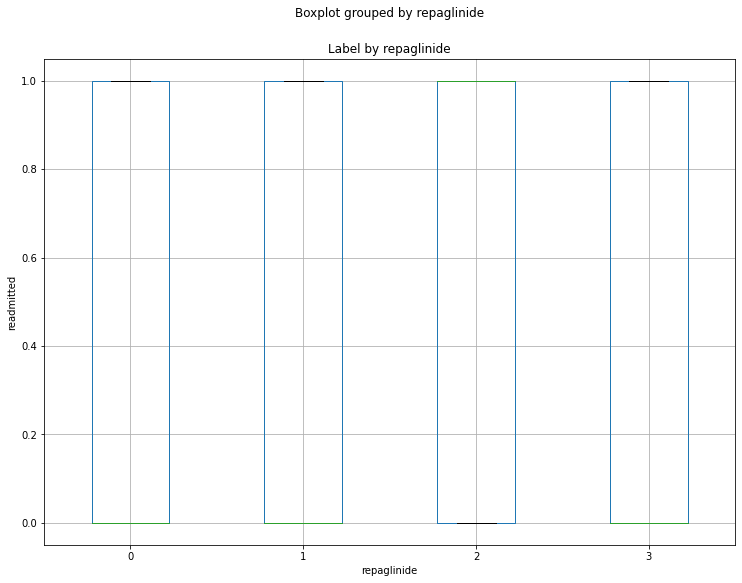

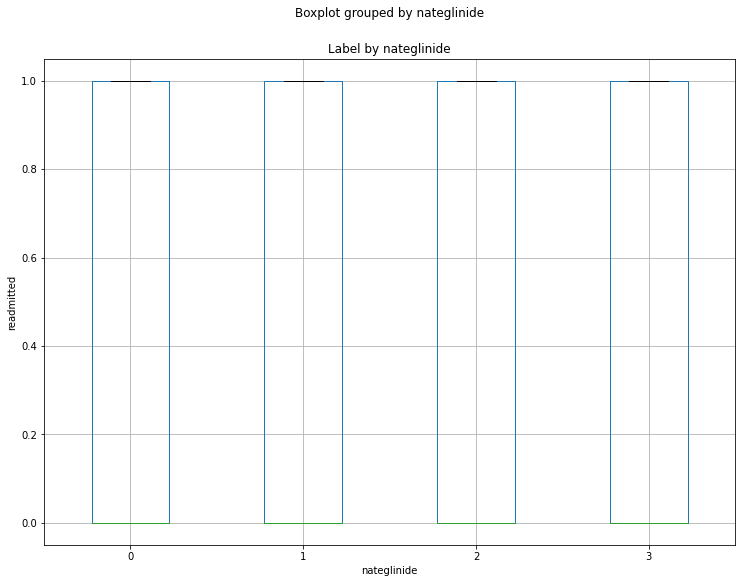

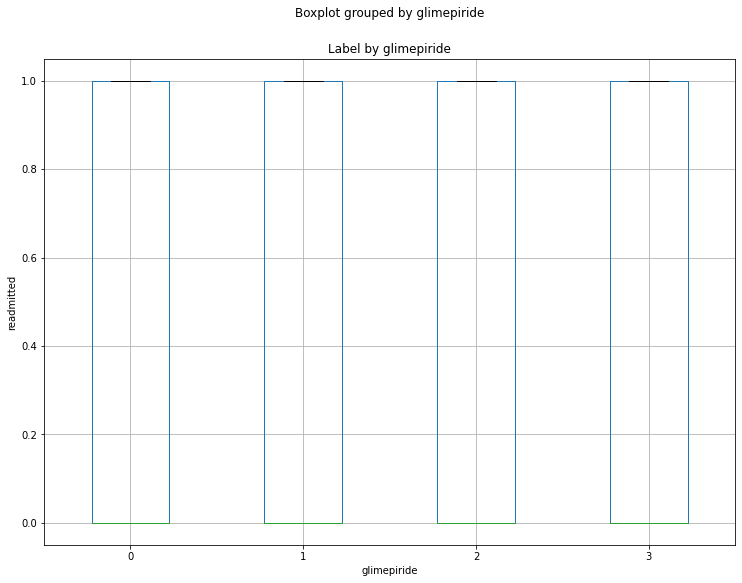

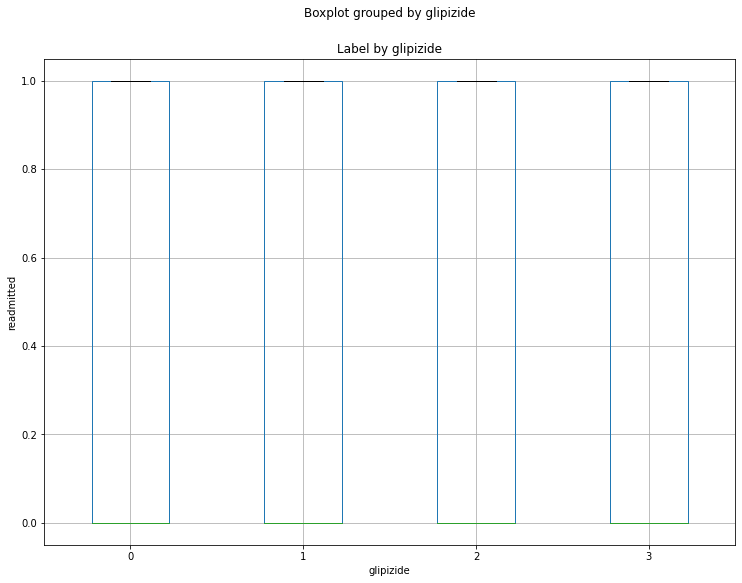

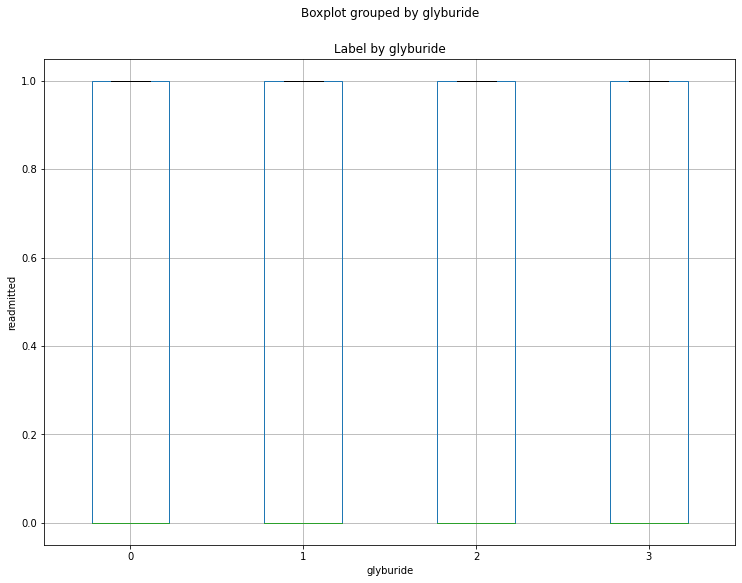

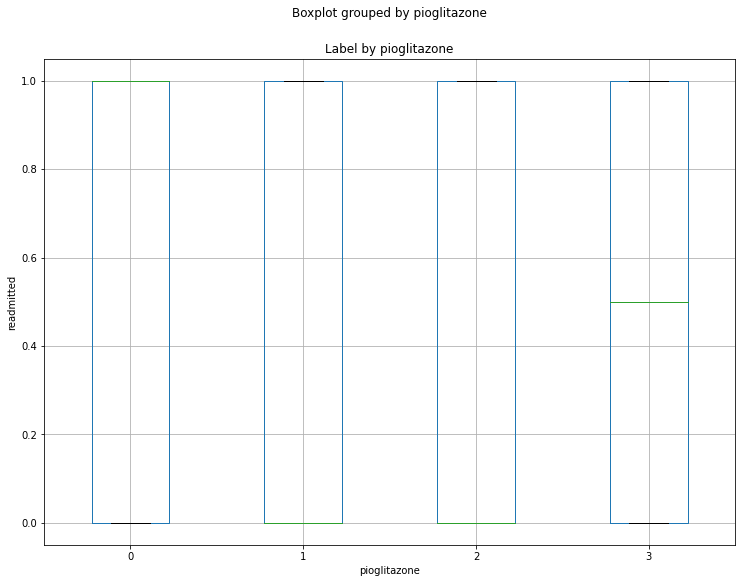

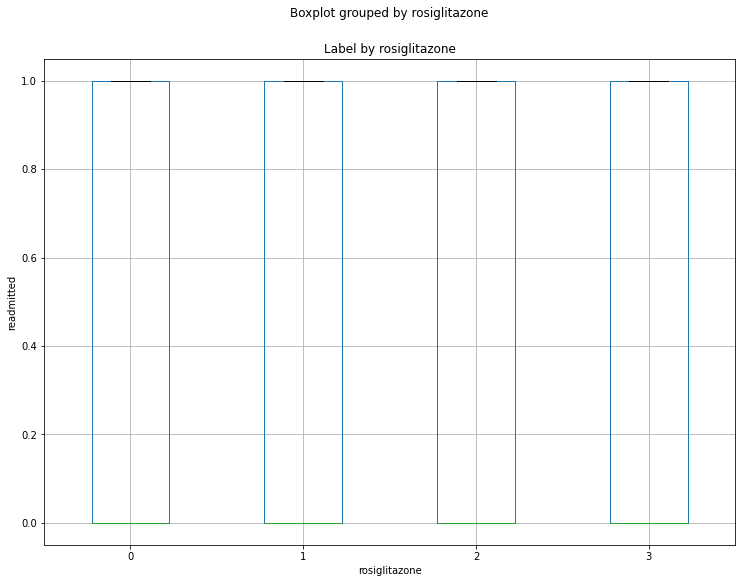

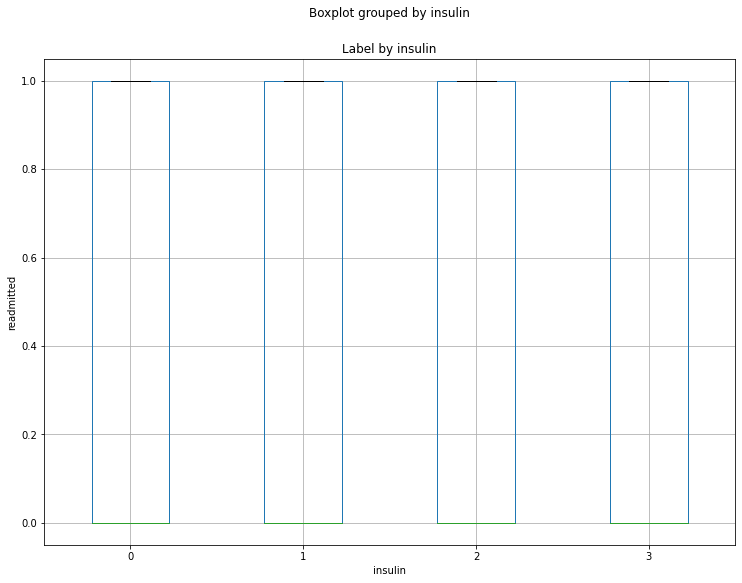

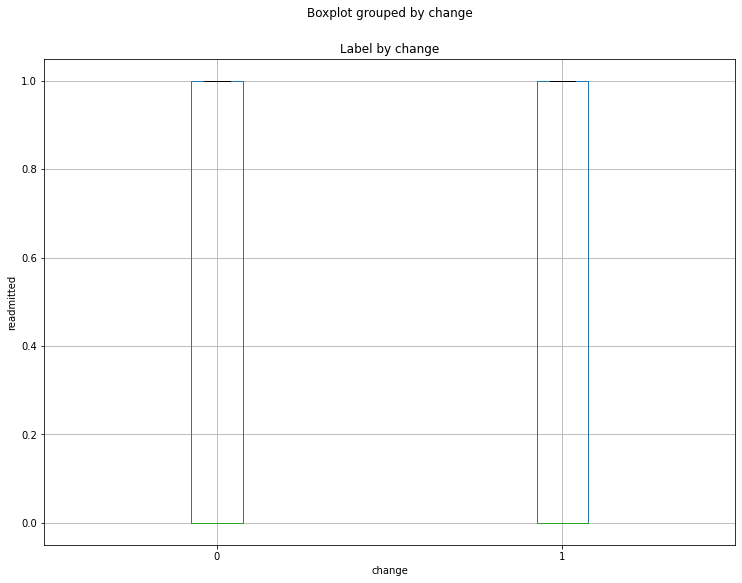

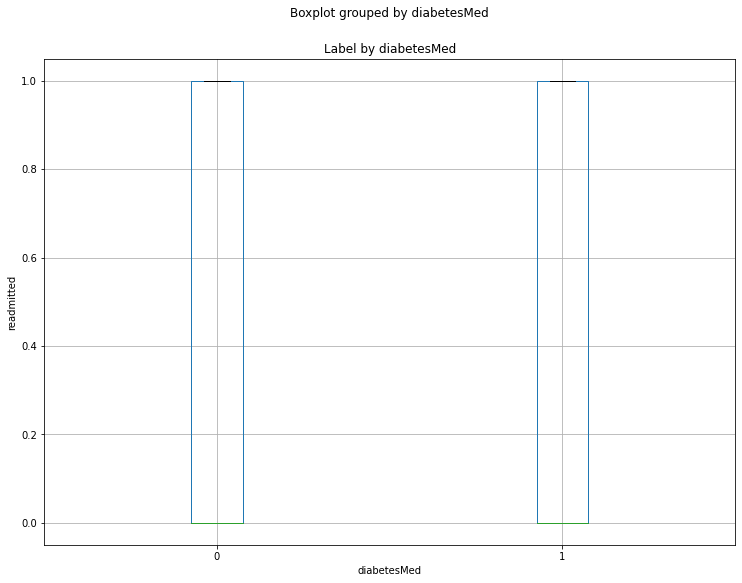

In [85]:
for col in cat_features:
    fig = plt.figure(figsize=(12, 9))
    ax = fig.gca()
    df.boxplot(column = 'readmitted', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("readmitted")
plt.show()

<AxesSubplot:>

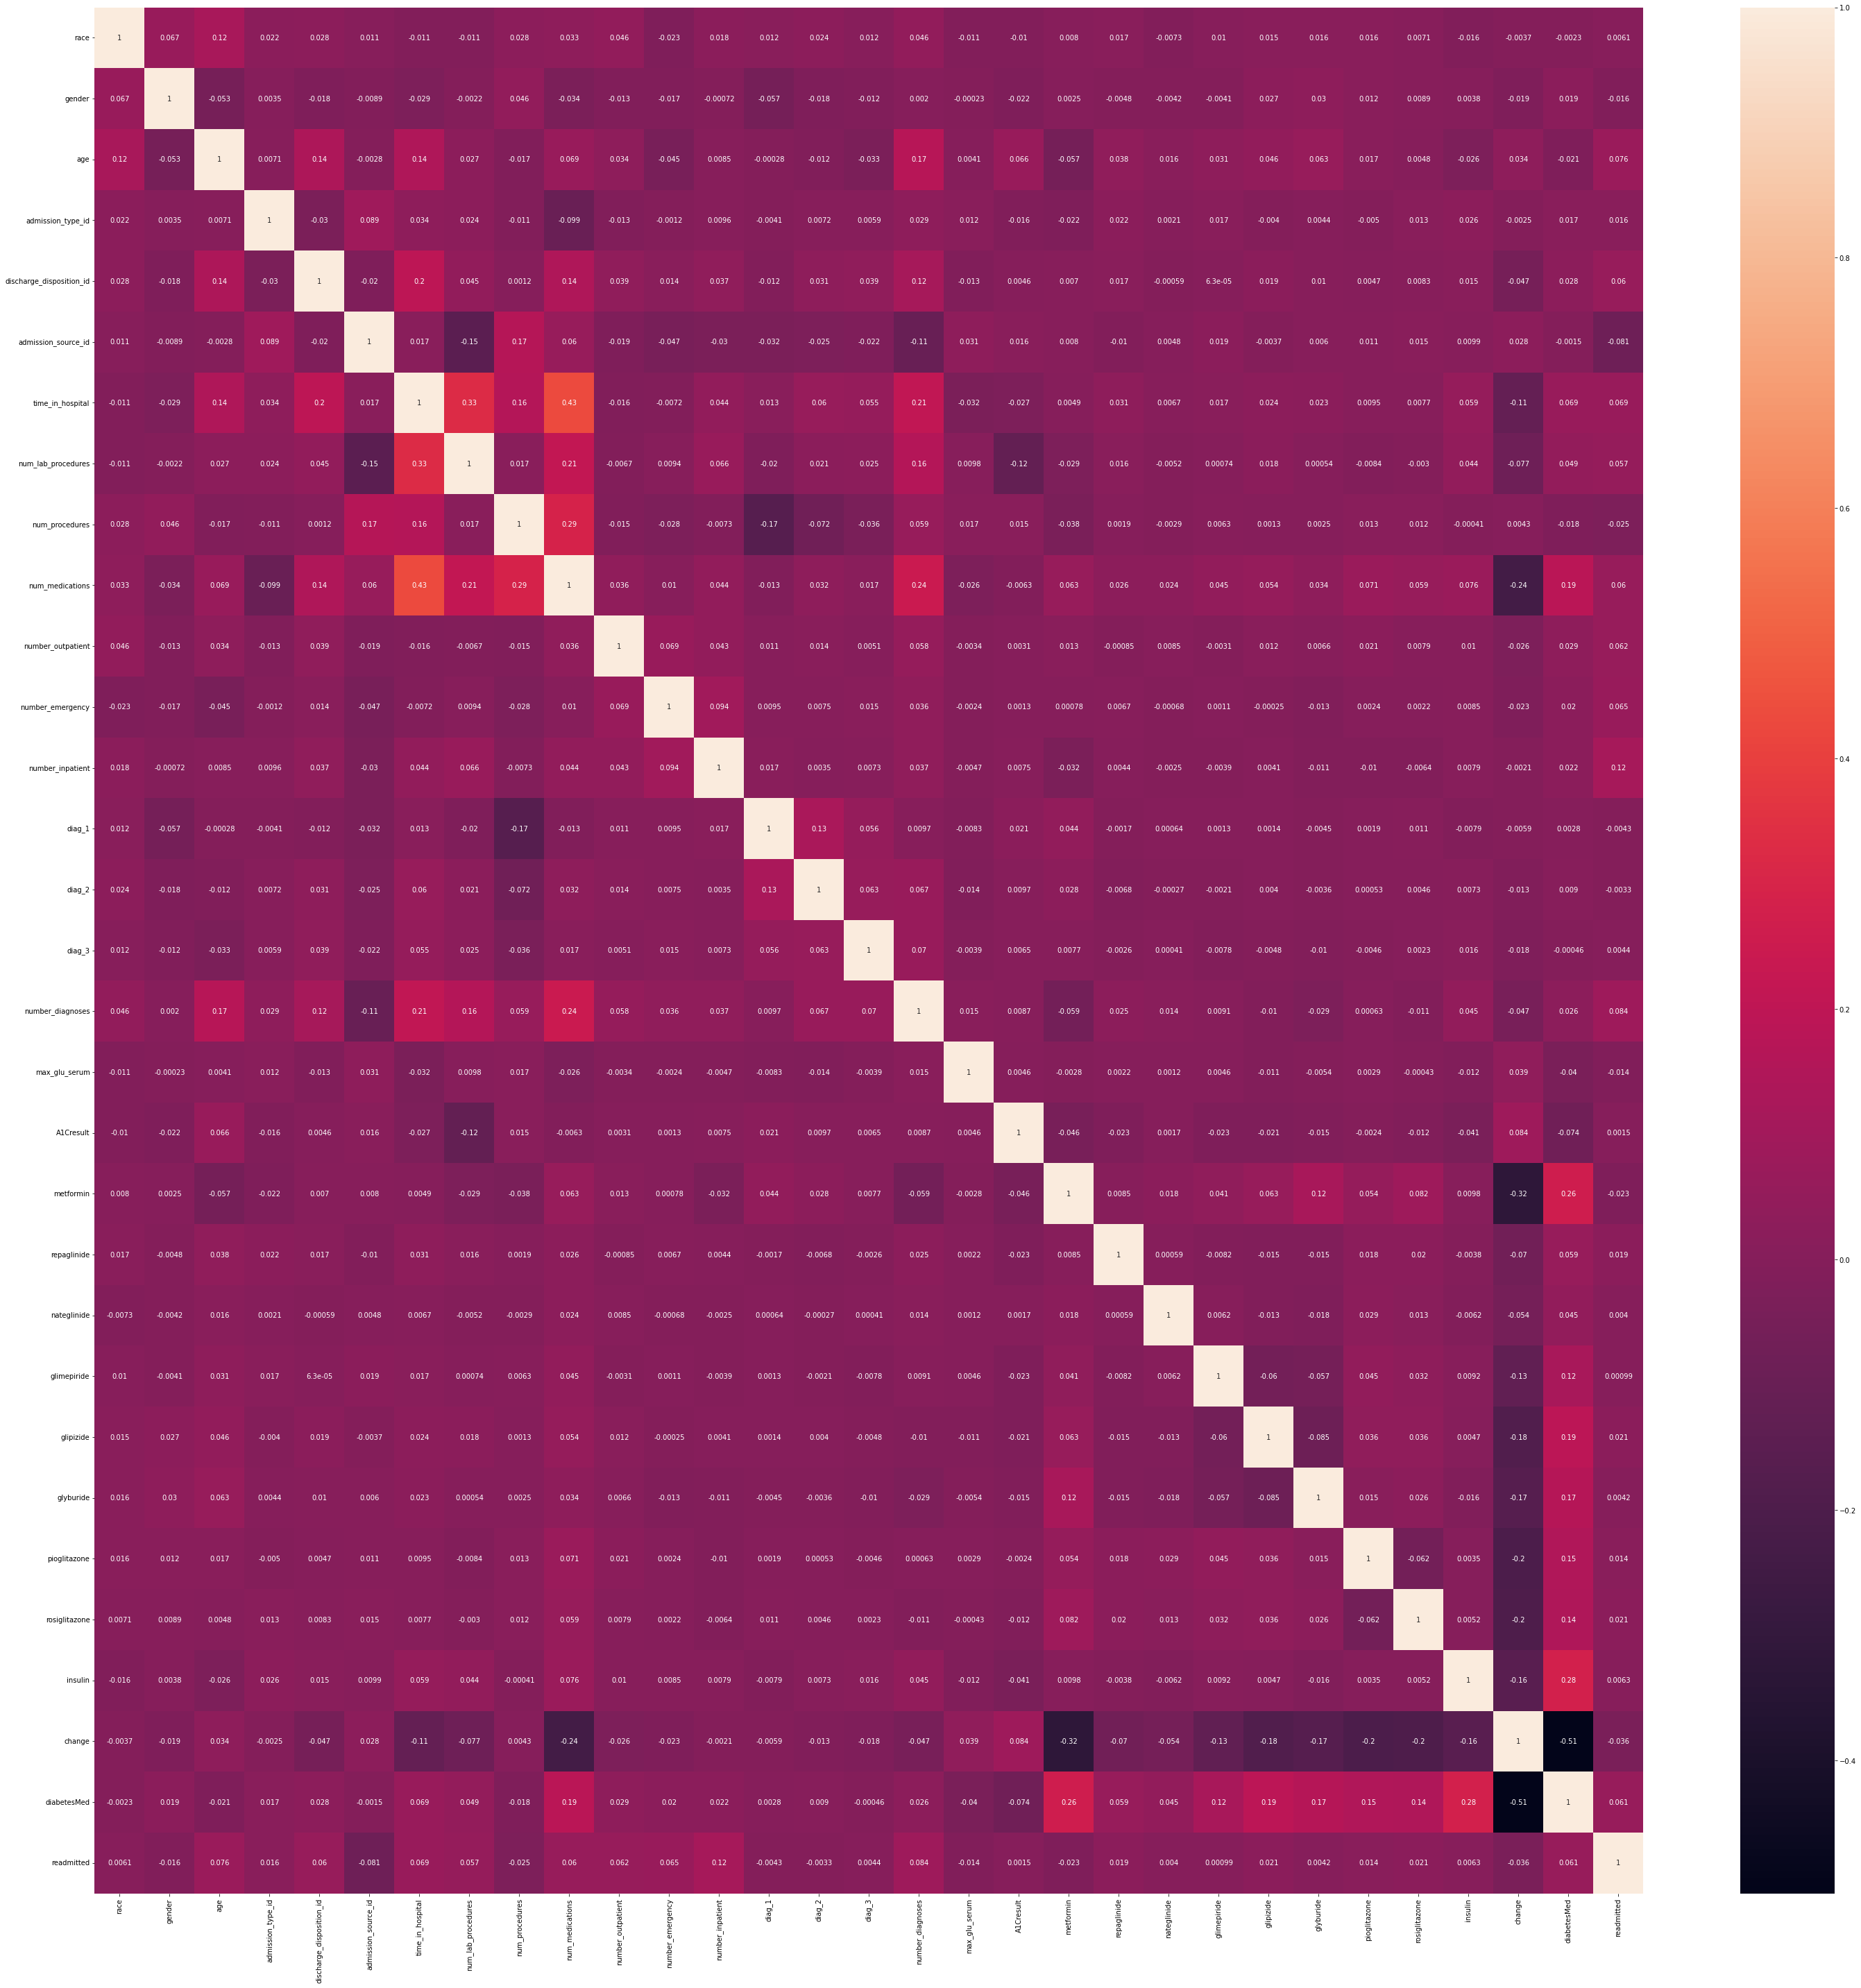

In [86]:
cor=df.corr()
plt.figure(figsize=(50,50))
sns.heatmap(cor, annot=True)

# Multicollinearity - VIF

In [87]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
# df_copy=df
# x = df_copy.drop(['readmitted'],axis=1)
  
# # VIF dataframe
# vif_data = pd.DataFrame()
# vif_data["feature"] = x.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(x.values, i)
#                           for i in range(len(x.columns))]
  
# print(vif_data)

In [89]:
# #Vif >10
# df=df.drop(labels=['age','max_glu_serum', 'A1Cresult', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
#                   'glyburide', 'pioglitazone', 'rosiglitazone'], axis=1)

In [90]:
# #Vif >5
# df=df.drop(labels=['metformin', 'diabetesMed', 'race'], axis=1)

In [91]:
# df.head()

In [92]:
# df.shape

# Saving Preprocessed data to CSV

In [93]:
#df.to_csv('processed file.csv')

# Model Training - Pycaret

In [94]:
import pycaret

In [95]:
from pycaret.classification import *

In [96]:
classifier = setup(data = df, target = 'readmitted', session_id=123, categorical_features=cat_features, 
                   fix_imbalance=True, normalize=True, remove_outliers=True)

,Description,Value
0,session_id,123
1,Target,readmitted
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(69972, 31)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,30
8,Ordinal Features,False
9,High Cardinality Features,False


In [97]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6246,0.6417,0.3105,0.5755,0.4033,0.1638,0.1804,18.3350
xgboost,Extreme Gradient Boosting,0.6203,0.6355,0.3448,0.5573,0.4260,0.1652,0.1758,23.4900
gbc,Gradient Boosting Classifier,0.6175,0.6305,0.3076,0.5584,0.3965,0.1497,0.1641,21.5330
rf,Random Forest Classifier,0.6115,0.6195,0.3278,0.5407,0.4081,0.1442,0.1542,20.7050
et,Extra Trees Classifier,0.6074,0.6158,0.3419,0.5305,0.4157,0.1405,0.1482,22.2940
nb,Naive Bayes,0.5968,0.5980,0.4233,0.5156,0.4572,0.1445,0.1493,18.8840
ada,Ada Boost Classifier,0.5948,0.6128,0.4686,0.5047,0.4858,0.1523,0.1527,18.7270
dummy,Dummy Classifier,0.5913,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,17.8070
lr,Logistic Regression,0.5904,0.6248,0.5800,0.4990,0.5364,0.1732,0.1748,21.4850
ridge,Ridge Classifier,0.5900,0.0000,0.5807,0.4986,0.5365,0.1727,0.1744,18.5870


# Models to implement: lr, dt, rf, svm, xgboost, lgbm

In [98]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [119]:
print("Options: lr, dt, rf, svm, xgboost, lgbm")
model=input(('Please type in the model:'))

Options: lr, dt, rf, svm, xgboost, lgbm
Please type in the model:lr


In [100]:
model_temp=create_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5965,0.6262,0.5799,0.5055,0.5402,0.1837,0.1850
1,0.5841,0.6184,0.5652,0.4924,0.5263,0.1588,0.1600
2,0.5822,0.6131,0.5626,0.4904,0.5240,0.1548,0.1560
3,0.5921,0.6237,0.5683,0.5009,0.5325,0.1733,0.1743
4,0.5949,0.6363,0.6146,0.5037,0.5536,0.1894,0.1926
5,0.5865,0.6172,0.5778,0.4950,0.5332,0.1660,0.1676
6,0.5994,0.6343,0.6052,0.5084,0.5526,0.1948,0.1973
7,0.5865,0.6237,0.5720,0.4950,0.5307,0.1646,0.1660
8,0.5925,0.6314,0.5802,0.5011,0.5378,0.1769,0.1784


In [101]:
tuned_model = tune_model(model_temp)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5950,0.6261,0.5747,0.5039,0.5370,0.1798,0.1810
1,0.5837,0.6184,0.5657,0.4920,0.5263,0.1582,0.1594
2,0.5824,0.6129,0.5620,0.4906,0.5239,0.1551,0.1562
3,0.5947,0.6242,0.5726,0.5037,0.5359,0.1787,0.1799
4,0.5962,0.6369,0.6146,0.5050,0.5544,0.1916,0.1947
5,0.5884,0.6181,0.5815,0.4971,0.5360,0.1703,0.1720
6,0.5992,0.6350,0.6088,0.5081,0.5539,0.1954,0.1980
7,0.5867,0.6237,0.5731,0.4952,0.5313,0.1652,0.1666
8,0.5960,0.6314,0.5818,0.5048,0.5406,0.1832,0.1847


In [102]:
params=tuned_model.get_params()
print(params)

{'C': 0.049, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 123, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


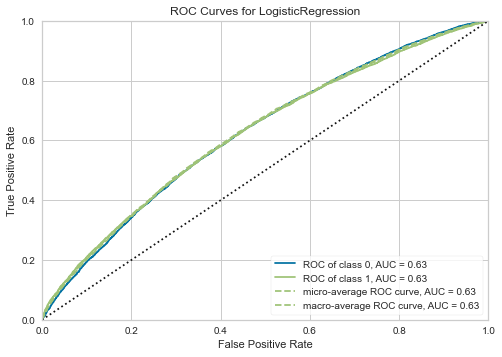

In [103]:
plot_model(tuned_model, plot = 'auc')

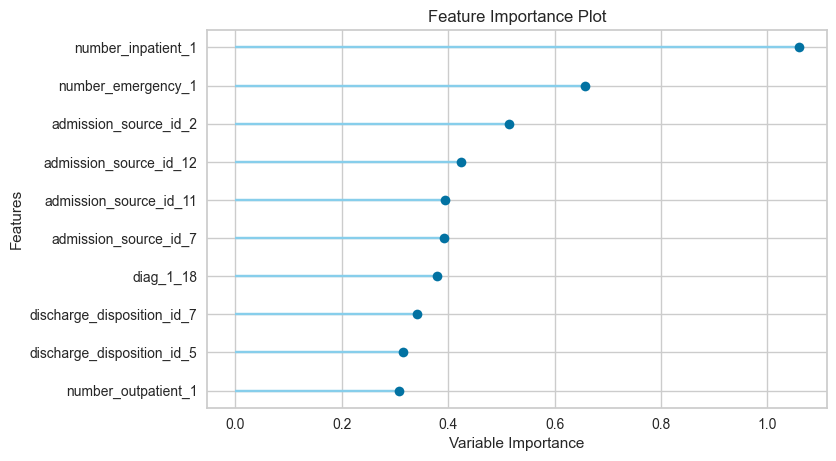

In [104]:
plot_model(tuned_model, plot = 'feature')

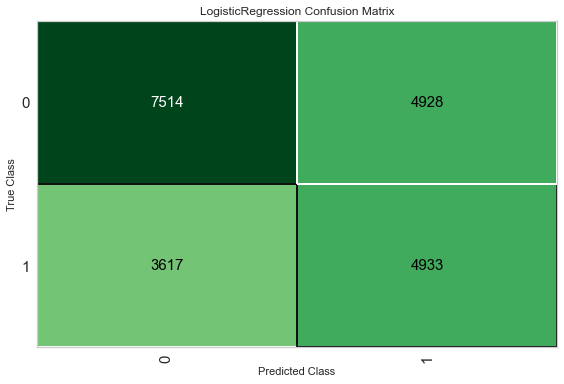

In [105]:
plot_model(tuned_model, plot = 'confusion_matrix')

In [106]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Streamlit from Pycaret - Getting Feature Importance of original features

In [116]:
### Feature Importance Score
import operator

if(classifier=="dt" or classifier=="rf" or classifier=="xgboost" or classifier=="lightgbm"):
    col=tuned_model.feature_importances_
    df1=pd.DataFrame({'Feature': get_config('X_train').columns})
    df1['Value'] = col.tolist()
    df1['Value']=df1['Value'].abs()
    df1.sort_values(by="Value", ascending=False)
    arr_original=df.columns
    coded_list = arr_original.tolist()
    dict={}
    i=0
    for ele in df1['Feature']:
        if ele in coded_list:
            dict[ele]=df1['Value'][i]
            coded_list.remove(ele)
        else:
            add=0
            for items in coded_list:
                if items in dict:
                    dict[items]=dict[items]+df1['Value'][i]
                else:
                    string = ele  
                    substring = items
                    if substring in string:
                        add=add+df1['Value'][i]
                        dict[items]=add
                    else:
                        continue
            del add
        i+=1
    del i
    sorted_dict = sorted(dict.items(),key = operator.itemgetter(1),reverse=True)
    
elif(classifier=="lr" or classifier=="svm"):
    col=tuned_model.coef_
    df1=pd.DataFrame({'Feature': get_config('X_train').columns})
    col=col.tolist()
    col=" ".join(str(x) for x in col)
    col=col.split(',')
    for i in range(len(col)):
        col[i] = col[i].replace('[', '')
        col[i] = col[i].replace(']', '')
    df1['Value'] = col
    df1['Value']=pd.to_numeric(df1['Value'])
    df1['Value']=df1['Value'].abs()
    df1.sort_values(by="Value", ascending=False)
    arr_original=df.columns
    coded_list = arr_original.tolist()
    dict={}
    i=0
    for ele in df1['Feature']:
        if ele in coded_list:
            dict[ele]=df1['Value'][i]
            coded_list.remove(ele)
        else:
            add=0
            for items in coded_list:
                if items in dict:
                    dict[items]=dict[items]+df1['Value'][i]
                else:
                    string = ele  
                    substring = items
                    if substring in string:
                        add=add+df1['Value'][i]
                        dict[items]=add
                    else:
                        continue
            del add
        i+=1
    sorted_dict = sorted(dict.items(),key = operator.itemgetter(1),reverse=True)

In [117]:
top_five_features=list()
for i in range(len(sorted_dict[:5])):
    top_five_features.append(sorted_dict[:5][i][0])
print(top_five_features)

['number_inpatient', 'number_emergency', 'admission_source_id', 'diag_1', 'discharge_disposition_id']


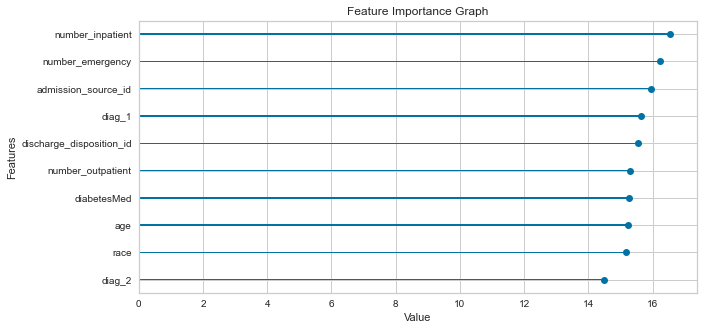

In [118]:
x, y = zip(*reversed(sorted_dict[:10]))
fig = plt.figure(figsize = (10, 5))
plt.ylabel("Features")
plt.xlabel("Value")
plt.title("Feature Importance Graph")
plt.barh(x, y, height=0.05, align="center")
plt.plot(y, x, 'o')

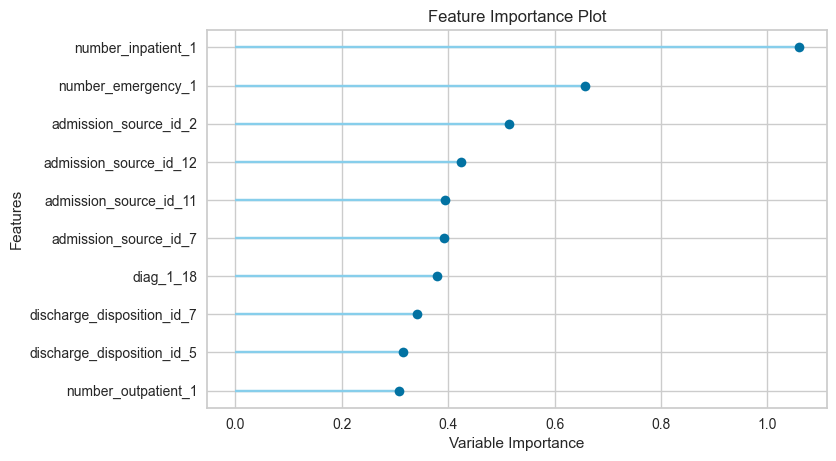

In [121]:
plot_model(tuned_model, plot = 'feature')